In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import smart_open
from io import StringIO
from Bio import SeqIO
# Function to parse the FASTA content
def parse_fasta(fasta_content):
    fasta_io = StringIO(fasta_content)
    records = list(SeqIO.parse(fasta_io, "fasta"))
    return records
with smart_open.open('s3://velia-annotation-dev/gencode/v42/gencode.v42.transcripts.fa.gz') as f:
    contents = f.read()
    records = parse_fasta(contents)

In [49]:
from dashboard.etl.transcript_features import *

In [42]:
transcripts_to_map = xena_expression.columns[50:]

In [71]:
xena, metadata, tissue_pairs = load_xena_transcripts_with_metadata_from_s3(transcripts_to_map)

In [78]:
    all_transcripts = [i for i in transcripts_to_map if i.startswith('ENST')]
    # de_tables_dict, de_metadata = load_de_results(all_transcripts)
    # de_tables_dict = {k.split('.')[0]:v for k, v in de_tables_dict.items()}
    # Sum expression over each VTX            
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]

In [79]:
xena_vtx_sums

,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,GTEX-13OVI-1026-SM-5L3EM,GTEX-13OW5-0626-SM-5J2N2,GTEX-XUZC-2026-SM-4BRW9,TCGA-EK-A2RE-01,TCGA-D5-5538-01,TCGA-VM-A8C8-01,GTEX-X88G-0426-SM-47JZ5,TCGA-ZN-A9VQ-01,TCGA-EE-A17X-06,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,TCGA-05-4420-01,GTEX-13W3W-2626-SM-5SIA2,GTEX-WQUQ-2526-SM-4MVNO,TCGA-2G-AAFZ-01,GTEX-P44H-0526-SM-2XCF1,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-E2-A153-11,GTEX-TSE9-0126-SM-3DB83,GTEX-R55F-0226-SM-48FCI,TCGA-EJ-7125-01,TCGA-IN-7808-01,TCGA-L5-A4OH-01,TCGA-RP-A695-06,TCGA-A4-7828-01,TARGET-20-PARXMP-09,GTEX-13QJC-0011-R8b-SM-5S2U6,GTEX-POMQ-0006-SM-5SI7D,TCGA-B9-A8YH-01,GTEX-Y9LG-0426-SM-4VBRT,TCGA-E1-A7YI-01,TCGA-PC-A5DM-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,TCGA-A2-A3XX-01,GTEX-QXCU-0626-SM-2TC69,TCGA-DQ-5624-01,TCGA-KK-A7B3-01,GTEX-1269C-2626-SM-5EQ5C,TCGA-HG-A2PA-01,TCGA-06-5412-01,GTEX-ZPCL-0126-SM-4WWC8,TCGA-BP-4989-01,...,TCGA-AN-A0XT-01,GTEX-13VXU-1126-SM-5LU3U,TCGA-62-8402-01,GTEX-131XF-0626-SM-5GIDS,TCGA-QR-A70C-01,TCGA-DU-A76O-01,TCGA-EE-A29L-06,TCGA-44-2659-01,TCGA-4X-A9F9-01,TCGA-C5-A1BJ-01,TCGA-G2-AA3C-01,TCGA-HU-8602-01,TCGA-CR-6470-01,TCGA-CH-5768-01,TCGA-2H-A9GM-01,TCGA-XH-A853-01,GTEX-1313W-1626-SM-5J1OE,GTEX-1122O-2126-SM-5EGIR,TCGA-CM-4751-01,GTEX-T6MN-0011-R6A-SM-5CHQD,TCGA-AO-A0J4-01,GTEX-12ZZY-1526-SM-5LZWF,GTEX-WI4N-2026-SM-4OOS7,TCGA-55-6985-11,TCGA-2Y-A9H2-01,GTEX-R55E-0008-SM-48FCG,TCGA-YL-A9WK-01,TCGA-77-6844-01,TCGA-B8-5549-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-AA-3660-01,TCGA-13-1481-01,GTEX-1399R-0426-SM-5IJE3,GTEX-YFCO-1626-SM-4W1Z3,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,GTEX-X3Y1-1226-SM-4PQZ8,TCGA-IB-7885-01,TCGA-B6-A0IA-01,GTEX-1117F-2826-SM-5GZXL,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,GTEX-11ZTS-3326-SM-5LU9Y,TCGA-DD-A115-01,GTEX-ZA64-2126-SM-5Q5A8,TCGA-FV-A3I0-11,GTEX-XV7Q-0426-SM-4BRVN
ENST00000530455,6.760828,22.541319,31.010825,17.551227,3.681006,12.780745,26.280121,16.691017,5.211144,22.271086,22.761126,9.530818,16.180676,18.840953,5.030842,15.741488,6.931175,23.451365,8.101000,16.911116,26.071470,30.781679,14.960640,23.501811,15.880671,8.411132,14.590931,12.281373,7.400896,9.840966,11.971234,13.161025,7.801221,8.930866,0.590988,11.871250,20.470863,14.050991,9.011080,4.940990,33.801140,59.059613,18.320665,6.000988,14.741383,3.980915,10.290920,50.611734,25.061485,5.190955,...,19.970520,11.120887,19.291588,13.061059,7.700756,31.679991,22.951237,14.691400,9.770958,16.801289,8.111114,28.720322,16.111289,27.131558,6.241099,14.090980,13.621371,5.650976,30.320045,0.001,29.020491,14.541458,0.001000,11.450987,21.671093,11.920724,42.971255,27.811314,13.080992,4.950932,33.920840,12.651180,42.411982,11.431161,4.771027,13.941366,15.210546,42.929575,31.060303,13.841228,19.780404,19.160987,16.450961,5.931101,1.121011,13.011361,6.821079,24.340721,2.950992,16.630965
ENST00000510385,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
ENST00000238609,62.769856,123.058457,141.190577,35.270741,6.241099,41.542035,51.261365,14.511251,163.506026,38.891959,246.133974,50.992035,82.219005,133.333917,10.340973,72.519647,27.840

In [94]:
    xena_expression = xena[xena.columns[6:]]#pd.read_parquet(os.path.join('../cache', 'xena.parq'))
    xena_metadata = metadata#xena_expression[xena_expression.columns[:6]].copy()
    # xena_expression = xena_expression[xena_expression.columns[6:]].copy()

    all_transcripts = [i for i in transcripts_to_map if i.startswith('ENST')]
    # Sum expression over each VTX            
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]
    xena_exact_vtx_sums = {}
    # xena_overlapping_vtx_sums = {}
    transcripts_in_xena = xena_expression.columns
    for vtx_id, row in tqdm(sorf_df.iterrows()):
        transcripts_parsed = [i.split('.')[0] if i.startswith('ENST') else i for i in row['transcripts_exact']]
        intersection_transcripts = transcripts_in_xena.intersection(transcripts_parsed)
        if len(intersection_transcripts) > 0:
            xena_exact_vtx_sums[vtx_id] = xena_expression[intersection_transcripts].sum(axis=1)
    xena_exact_vtx_sums = pd.DataFrame(xena_exact_vtx_sums)

5031it [00:09, 505.82it/s]


In [92]:
transcripts_in_xena

Index(['ENST00000368682', 'ENST00000587459', 'ENST00000238714',
       'ENST00000571129', 'ENST00000390159', 'ENST00000466260',
       'ENST00000623756', 'ENST00000505793', 'ENST00000452659',
       'ENST00000504154',
       ...
       'ENST00000544855', 'ENST00000461966', 'ENST00000397575',
       'ENST00000340834', 'ENST00000419336', 'ENST00000266070',
       'ENST00000530781', 'ENST00000467994', 'ENST00000466189',
       'ENST00000412094'],
      dtype='object', length=6645)

In [60]:
xena_exact_vtx_sums

""


In [81]:
xena_exact_vtx_sums

""


In [95]:
groups = metadata.loc[xena_exact_vtx_sums.index][['_primary_site', '_study']].apply(lambda x: '-'.join(x), axis=1)
groups

GTEX-S4Q7-0003-SM-3NM8M            Blood-GTEX
TCGA-19-1787-01                    Brain-TCGA
TCGA-S9-A7J2-01                    Brain-TCGA
GTEX-QV31-1626-SM-2S1QC     Blood Vessel-GTEX
TCGA-G3-A3CH-11                    Liver-TCGA
                                  ...        
GTEX-11ZTS-3326-SM-5LU9Y       Pituitary-GTEX
TCGA-DD-A115-01                    Liver-TCGA
GTEX-ZA64-2126-SM-5Q5A8            Nerve-GTEX
TCGA-FV-A3I0-11                    Liver-TCGA
GTEX-XV7Q-0426-SM-4BRVN             Lung-GTEX
Length: 19126, dtype: object

In [47]:
sorf_table = sorf_df.copy()

In [28]:
xena_exact_heatmap_data = process_sums_dataframe_to_heatmap(xena_exact_vtx_sums, xena_metadata)

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [15]:
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import pickle
import json
from app import *
from data_load import *
from plotting import *

CACHE_DIR = '../cache_update'

sorf_df = pd.read_parquet('../cache/sorf_df.parq')
sorf_df.head(3)

,show_details,vtx_id,aa_length,screening_phase_id,screening_phase,ucsc_track,source,orf_xrefs,protein_xrefs,gene_xrefs,transcript_xrefs,transcripts_exact,transcripts_overlapping,aa,nucl,index_copy,genscript_id,chr,strand,start,end,chrom_starts,block_sizes,phases,blastp_score,blastp_query_coverage,blastp_align_length,blastp_gaps,blastp_align_identity,blastp_subject,blastp_hit_description,Deepsig_score,SignalP 6slow_score,SignalP 5b_score,SignalP 4.1_score,Deepsig_cut,SignalP 6slow_cut,SignalP 5b_cut,SignalP 4.1_cut,Phobius,DeepTMHMM,trans1,trans2,trans3,sec1,sec2,sec3,translated_mean,secreted_mean,secreted,translated,swissprot_isoform,ensembl_isoform,refseq_isoform,phylocsf_58m_avg,phylocsf_58m_max,phylocsf_58m_min,phylocsf_vals
vtx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VTX-0333562,False,VTX-0333562,44,Phase_7_3,Phase 7,chr1:206557668-206583374,"[velia_phase7_Ribo-seq_PBMC_LPS_R848, openprot]","[IP_076823, Phase_7_3, Phase_7_3_pcDNA3.1(+), U482HJGUG0-6]","[Phase_7_3, Phase7_3, Phase_7_3_pcDNA3.1(+)]",17609;83593;ENSG00000266094.8;gene-RASSF5;HGNC:17609;RASSF5;RASSF5,ENSE00002741341.1;exon:ENST00000586344.5:12;ENSE00003475713.1;ENSE00003584726.1;exon-CHS.25457.7;exon-CHS.25457.7;exon-CHS.25457.7;exon:ENST00000586696.5:10;exon:ENST00000588304.5:10;exon:ENST0000...,"[ENST00000577571.5, ENST00000605120.1]","[ENST00000577571, ENST00000580449, ENST00000581503, ENST00000605120, ENST00000579436, CHS, rna-NM_182664, ENST00000636182, rna-NM_182665]",MRRANIFQRMSVNLWRRHSARPHCRRSSRRSTATTRERRTAWA*,ATGCGCAGAGCAAACATCTTTCAAAGAATGTCTGTAAACCTGTGGAGGAGACACAGCGCCCGCCCACACTGCAGGAGATCAAGCAGAAGATCGACAGCTACAACACGCGAGAGAAGAACTGCCTGGGCATGA,VTX-0333562,U482HJGUG0-6,chr1,+,206557668,206583374,206557668;206583269,25;105,0;1,NaN,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.013147,0.121,-1,-1,-1,-1,-1,-1,200.0,670.0,770.0,0.0,0,0.0,546.666667,0.0,False,False,None,None,None,-8.441636,-4.863,-15.000,"[-9.486000061035156, -9.486000061035156, -9.486000061035156, -7.605999946594238, -7.605999946594238, -7.605999946594238, -5.49399995803833, -5.49399995803833, -5.49399995803833, -6.14300012588501,..."
VTX-0391857,False,VTX-0391857,49,Phase_7_18,Phase 7,chr11:118304942-118312650,"[velia_phase7_Ribo-seq_PBMC_LPS_R848, openprot]","[IP_202416, Phase_7_18, Phase_7_18_pcDNA3.1(+), U482HJGUG0-36]","[Phase_7_18, Phase7_18, Phase_7_18_pcDNA3.1(+)]",CD3E;ENSG00000198851.10;HGNC:1674;1674;916;CD3E;gene-CD3E,ENSG00000263725.1;FTLP13;HGNC:37963;ENSE00003866209.1;exon:ENST00000665101.1:2;ENSE00001852417.1;exon:ENST00000464084.5:10;ENSE00003643563.1;ENSE00003817311.1;ENSE00003817311.1;ENSE00003825037.1;e...,"[ENST00000529713.5, ENST00000361763.9]","[ENST00000526146, ENST00000528435, ENST00000528600, ENST00000529713, ENST00000361763]",MKQRCSRALTGEFWASASYQLAFGGKMVMKKWVVLHRHHIKSPSLEPQ*,ATGAAACAAAGATGCAGTCGGGCACTCACTGGAGAGTTCTGGGCCTCTGCCTCTTATCAGTTGGCGTTTGGGGGCAAGATGGTAATGAAGAAATGGGTGGTATTACACAGACACCATATAAAGTCTCCATCTCTGGAACCACAGTAA,VTX-0391857,U482HJGUG0-36,chr11,+,118304942,118312650,118304942;118307288;118308427;118312153;118312618,59;20;14;17;32,0;0;0;0;0,NaN,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.004978,0.177,-1,-1,-1,-1,-1,-1,10.0,10.0,10.0,10.0,0,0.0,10.000000,10.0,False,False,None,None,None,-9.262898,-2.806,-15.000,"[-11.847999572753906, -11.847999572753906, -11.847999572753906, -6.6579999923706055, -6.6579999923706055, -6.6579999923706055, -9.097999572753906, -9.097999572753906, -9.097999572753906, -14.69600..."
VTX-0402630,False,VTX-0402630,43,Phase_7_20,Phase 7,chr12:25062830-25063780,"[velia_phase7_Ribo-seq_PBMC_LPS_R848, openprot]","[IP_207916, Phase_7_20, Phase_7_20_pcDNA3.1(+), U482HJGUG0-40]","[Phase_7_20, Phase7_20, Phase_7_20_pcDNA3.1(+)]",ENSG00000118308.16;HGNC:6690;IRAG2;4033;6690;gene-IRAG2;IRAG2,ENSG00000260242;ENSG00000260242.1;ENSG00000269504;ENSG00000269504.3;ENSE00001485571.1;exon-CHS.32768.2;exon:ENST00000380589.4:1;exon-NM_080739.2-1;ENSE00003983568.1;exon:ENST00000701705.1:4;ENSE00...,"[ENST00000636465.1, ENST00000557489.6, ENST00000548766.5, 

In [3]:
from veliadb import base
with base.Session() as session:
    i = session.query(base.Orf).first()
    print(i)

ORF: 286647, VTX-0286647, ,(+)chr1:1308644-1310921


In [20]:
xena_overlap = ['ENST00000577571', 'ENST00000605120']
xena_metadata, xena_transcript_ids = load_xena_metadata()
selected_expression_tcga = pd.read_parquet('../cache/xena_app.parq', columns=xena_overlap)
selected_expression_tcga_ave = selected_expression_tcga.groupby(xena_metadata['dashboard_group']).mean()

In [22]:
                vtx_id = 'VTX-0333562'
                title = f'TCGA/GTEx Transcript Specific Expression - {vtx_id}'
                selected_expression_tcga = pd.read_parquet('../cache/xena_app.parq', columns=xena_overlap)
                selected_expression_tcga_ave = selected_expression_tcga.groupby(xena_metadata['dashboard_group']).mean()
                echart_option_tcga, events_tcga = plotting.expression_heatmap_plot(title, 
                                                                                   selected_expression_tcga_ave,
                                                                                   list(xena_overlap))

{'click': 'function(params) { console.log(params.name); return params.name }',
 'dblclick': 'function(params) { return [params.type, params.name, params.value] }'}

In [25]:
selected_transcripts = ['ENST00000577571.5', 'ENST00000605120.1']
formatted_ids = ', '.join(f"'{id_}'" for id_ in selected_transcripts)
sql_query = f"SELECT * FROM transcript_tpm WHERE transcript_tpm.transcript_id IN ({formatted_ids});"
selected_expression_ai = pd.read_sql(sql_query, sqlite3.connect('../data/autoimmune_expression_atlas_v1.db'))
selected_expression_ai_ave = selected_expression_ai.pivot_table(index='group',
                                                        columns='transcript_id',
                                                        values='tpm', 
                                                        aggfunc=np.nanmean).fillna(0.01)
echart_option_ai, events_ai = plotting.expression_heatmap_plot(title,
                                                               selected_expression_ai_ave,
                                                               median_groups=False)

In [26]:
echart_option_ai

{'title': {'text': 'TCGA/GTEx Transcript Specific Expression - VTX-0333562'},
 'tooltip': {'formatter': "--x_x--0_0--function (params) {var cols = ['NEUTROPHIL--BEHCETS_DISEASE','DENDRITIC_CELLS--SYSTEMIC_LUPUS_ERYTHEMATOSUS','MONOCYTE--HEALTHY','COLON--CROHNS_DISEASE','MONOCYTE--TYPE_2_DIABETES','DENDRITIC_CELLS--HEALTHY','THYROID--GRAVES_DISEASE','COLON--ULCERATIVE_COLITIS','COLON--HEALTHY','SYNOVIAL_TISSUE--RHEUMATOID_ARTHRITIS','SALIVARY_GLAND--HEALTHY','SYNOVIAL_TISSUE--ARTHRALGIA','SYNOVIAL_TISSUE--RHEUMATOID_ARTHRITIS_TRIPLE_DMARD','THYROID--HEALTHY','PANCREATIC_ISLET--TYPE_1_DIABETES','SALIVARY_GLAND--SJOGRENS_SYNDROME','SYNOVIAL_TISSUE--UNKNOWN_ARTHRITIS','SYNOVIAL_TISSUE--HEALTHY','SYNOVIAL_TISSUE--OSTEOARTHRITIS','THYROID--HASHIMOTOS_THYROIDITIS','BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS','PANCREATIC_ISLET--HEALTHY','BLOOD--HEALTHY','SYNOVIAL_FLUID--CALCIUM_PYROPHOSPHATE_DEPOSITION_DISEASE','DENDRITIC_CELLS--SYSTEMIC_SCLEROSIS','BLOOD--RHEUMATOID_ARTHRITIS','SYNOVIAL_FLUID--RHEUM

In [122]:
selected_transcripts = transcripts
selected_transcripts = ['ENST00000519868.1', 'ENST00000229239.10', 'ENST00000520450.1']
formatted_ids = ', '.join(f"'{id_}'" for id_ in selected_transcripts)
sql_query = f"SELECT * FROM transcript_tpm WHERE transcript_tpm.transcript_id IN ({formatted_ids});"
selected_expression = pd.read_sql(sql_query, sqlite3.connect('../data/autoimmune_expression_atlas_v1.db'))
# selected_expression.groupby('transcript_id')

In [33]:
selected_transcript = selected_transcripts[0]
db_address = '/home/ec2-user/repos/dashboard/data/autoimmune_expression_atlas_v1.db'
# option_ai_de = plotting.bar_plot_expression_group_autoimmune(selected_transcript[0], 'DE', db_address)
# st_echarts(options=option_ai_de, key='c', height='900px', width = '650px', renderer='svg')

fig_ai = px.box(data_frame = selected_expression_ai[selected_expression_ai['transcript_id']==value].sort_values('group'),
    x='group', points = 'all',
    y='tpm', height=500,
    width=800
)
option_ai_de

{'title': {'text': 'DE'},
 'tooltip': {'trigger': 'axis',
  'formatter': "--x_x--0_0--function (params) {var cols = {}; console.log(params); return params[0].name + ' - ' + cols[params[0].name] + '<br>' + params[0].seriesName + ': ' + params[0].value  + '<br>' + params[1].seriesName + ': ' + params[1].value;}--x_x--0_0--"},
 'legend': {'data': ['control_mean', 'case_mean'],
  'orient': 'vertical',
  'right': -5,
  'top': 'center'},
 'toolbox': {'show': True,
  'feature': {'dataView': {'show': True, 'readOnly': False},
   'restore': {'show': True},
   'saveAsImage': {'show': True}}},
 'calculable': True,
 'yAxis': [{'name': 'Study',
   'nameLocation': 'middle',
   'nameGap': 50,
   'type': 'category',
   'data': [],
   'axisLabel': {'interval': 0}}],
 'xAxis': [{'name': 'Approximate TPM \n (Transcripts in bold are DE with FDR < 1e-5 and abs(LFC) > 1)',
   'nameLocation': 'middle',
   'nameGap': 30,
   'type': 'value'}],
 'color': ['#237c94', '#d62418'],
 'series': [{'name': 'control_mea

In [ ]:
                xena_vtx_exp_df = xena_metadata.merge(selected_expression_tcga, left_index=True, right_index=True)
                fig = plotting.expression_vtx_boxplot(value.split('.')[0], xena_vtx_exp_df)
                st.plotly_chart(fig, use_container_width=True)

In [130]:
from veliadb import base


vtx_id = 'VTX-0333562'
vtx_id = int(vtx_id.replace('VTX-', ''))

session = base.Session() # connect to db
orfs = session.query(base.Orf).filter(base.Orf.id == vtx_id).all()
if len(orfs) == 0:
    print(f"{vtx_id} not found in veliadb")
    session.close()
    # return {}
elif len(orfs) > 1:
    print(f"{vtx_id} had multiple entries found in veliadb")
    session.close()
    # return {}
else:
    current_orf = orfs[0]

NameError: name 'selected_expression_tcga' is not defined

In [141]:
selected_expression_ai[selected_expression_ai['transcript_id']=='ENST00000425838.5'].shape

(31, 4)

In [137]:
selected_expression_ai[selected_expression_ai['transcript_id']=='ENST00000425838.5']

,transcript_id,tpm,group,study
0,ENST00000425838.5,0.116956,COLON--HEALTHY,ERP106487
1,ENST00000425838.5,0.197509,COLON--CROHNS_DISEASE,ERP106487
2,ENST00000425838.5,0.201686,COLON--HEALTHY,ERP106487
3,ENST00000425838.5,0.530314,COLON--CROHNS_DISEASE,ERP106487
4,ENST00000425838.5,0.053020,BLOOD--RHEUMATOID_ARTHRITIS,GSE120178
5,ENST00000425838.5,0.132803,PBMC--SYSTEMIC_LUPUS_ERYTHEMATOSUS,GSE122459
6,ENST00000425838.5,0.421640,NEUTROPHIL--SYSTEMIC_LUPUS_ERYTHEMATOSUS,GSE139358
7,ENST00000425838.5,0.085646,NEUTROPHIL--SYSTEMIC_LUPUS_ERYTHEMATOSUS,GSE139358
8,ENST00000425838.5,0.249370,NEUTROPHIL--SYSTEMIC_LUPUS_ERYTHEMATOSUS,GSE139358
9,ENST00000425838.5,0.344245,NEUTROPHIL--SYSTEMIC_LUPUS_ERYTHEMATOSUS,GSE139358


In [126]:
                selected_transcripts = sorf_df.loc['VTX-0033912', 'transcripts_exact']
                formatted_ids = ', '.join(f"'{id_}'" for id_ in selected_transcripts)
                sql_query = f"SELECT * FROM transcript_tpm WHERE transcript_tpm.transcript_id IN ({formatted_ids});"
                selected_expression_ai = pd.read_sql(sql_query, sqlite3.connect('../data/autoimmune_expression_atlas_v1.db'))
                selected_expression_ai_ave = selected_expression_ai.pivot_table(index='group',
                                                                        columns='transcript_id',
                                                                        values='tpm', 
                                                                        aggfunc=np.mean).fillna(0.01)
                selected_expression_ai_ave

transcript_id,ENST00000425838.5,ENST00000498375.2
group,,
BLOOD--HEALTHY,0.095155,0.135946
BLOOD--RHEUMATOID_ARTHRITIS,0.053020,0.044144
BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS,0.024451,0.013805
BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS_DNA_ANTIGEN+,0.043961,0.010000
BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS_NUCLEAR_ANTIGEN+,0.108710,0.010000
COLON--CROHNS_DISEASE,0.214136,0.100882
COLON--HEALTHY,0.143382,0.026093
COLON--ULCERATIVE_COLITIS,0.113511,0.022197
NEUTROPHIL--HEALTHY,0.010000,0.099391


In [99]:
xena_overlap = transcripts
selected_expression = pd.read_parquet('../cache/xena_app.parq', columns=xena_overlap)
selected_expression

,ENST00000519868,ENST00000520450
GTEX-S4Q7-0003-SM-3NM8M,1.580959,11.001284
TCGA-19-1787-01,0.141003,1.100989
TCGA-S9-A7J2-01,0.021000,0.150998
GTEX-QV31-1626-SM-2S1QC,0.100998,0.231006
TCGA-G3-A3CH-11,0.050999,0.231006
...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,0.171004,1.641028
TCGA-DD-A115-01,0.001000,0.001000
GTEX-ZA64-2126-SM-5Q5A8,0.090999,0.600985
TCGA-FV-A3I0-11,0.001000,0.201005


In [97]:
import sqlite3

# Replace this with your SQLite database file path
db_file = '../data/autoimmune_expression_atlas_v1.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Query to find all table names in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)

# Fetching all table names
tables = cursor.fetchall()

# Print table names
for table in tables:
    print(table[0])
df = pd.read_sql("SELECT * FROM transcript_de", conn)
# Close the connection
conn.close()
df

transcript_de
transcript_tpm
transcript_tpm_minimum_expression_skipped_transcript_ids


,velia_study,contrast,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,log10_padj,gene_id,case_mean,control_mean
0,ERP106487,CROHNSDISEASE_VS_CONTROL,ENST00000488147.1,29.468750,-0.021288,0.222218,-0.102614,0.918269,0.996522,-0.001513,ENSG00000227232.5,3.798333,3.703262
1,ERP106487,CROHNSDISEASE_VS_CONTROL,ENST00000466430.5,1.855763,0.617747,0.643210,1.433256,0.151785,NaN,0.000000,ENSG00000238009.6,0.280791,0.245071
2,ERP106487,CROHNSDISEASE_VS_CONTROL,rna-XR_952254.3,11.750264,0.278664,0.213170,1.386603,0.165563,0.670928,-0.173324,105373279,1.687640,1.415336
3,ERP106487,CROHNSDISEASE_VS_CONTROL,rna-XR_951617.3,5.756952,0.305724,0.358453,0.974066,0.330024,0.846886,-0.072175,105373279,0.858151,0.754685
4,ERP106487,CROHNSDISEASE_VS_CONTROL,rna-NM_020699.4-2,12.543118,0.370979,0.232892,1.687406,0.091525,0.523281,-0.281265,57459,1.829878,1.417359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822714,SRP379573,BEHCETS_DISEASE_vs_CONTROL,ENST00000361335.1,298.473448,0.001319,0.127671,0.316368,0.751723,0.999996,-0.000002,ENSG00000212907.2,43.479360,29.473344
5822715,SRP379573,BEHCETS_DISEASE_vs_CONTROL,ENST00000361381.2,5922.150594,0.001812,0.131872,0.420049,0.674450,0.999996,-0.000002,ENSG00000198886.2,903.727181,547.864661
5822716,SRP379573,BEHCETS_DISEASE_vs_CONTROL,ENST00000361567.2,1844.197280,0.002643,0.142837,0.650910,0.515105,0.999996,-0.000002,ENSG00000198786.2,309.515030,145.329207
5822717,SRP379573,BEHCETS_DISEASE_vs_CONTROL,ENST00000361681.2,630.951448,0.002054,0.138006,0.509570,0.610352,0.999996,-0.000002,ENSG00000198695.2,101.885756,53.328375


In [48]:
import os
import pandas as pd
transcripts = ['ENST00000519868', 'ENST00000520450']
    
def make_db_for_xena(vtx_id_to_transcripts):
    cache_filez = os.listdir(CACHE_DIR)
    temp_dict = {}
    for f in cache_filez:
        if f.endswith('_de.parq') and not (f=='expression_de.parq'):
            df = pd.read_parquet(os.path.join(CACHE_DIR, f))
            df['transcript'] = df.apply(lambda x: x.name.split('.')[0], axis=1)
            cancer_type = f.split('_')[0]
            temp_dict[cancer_type] = df
            df['TCGA Cancer Type'] = cancer_type
    df = pd.concat(temp_dict.values(), ignore_index=True)
    df['Cancer Mean'] = df['Cancer Mean']/TPM_DESEQ2_FACTOR
    df['GTEx Mean'] = df['GTEx Mean']/TPM_DESEQ2_FACTOR
    df = df.rename({'transcript': 'transcript_id'}, axis=1, inplace=False).drop('baseMean', axis=1)

    tcga_gtex_tissue_metadata = pd.read_parquet(os.path.join(CACHE_DIR, 'gtex_tcga_pairs.parq'))
    tcga_gtex_tissue_metadata = tcga_gtex_tissue_metadata.drop_duplicates(['TCGA Cancer Type', 'GTEx Tissue Type']).copy()
    tcga_gtex_tissue_metadata.index = tcga_gtex_tissue_metadata['TCGA Cancer Type']

    xena_metadata = pd.read_parquet(os.path.join(CACHE_DIR, 'xena_metadata.parq'))
    xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena_app.parq'))
    xena_exact_heatmap_data = pickle.load(open(os.path.join(CACHE_DIR, 'xena_exact_heatmap.pkl'), 'rb'))
    # xena_overlapping_heatmap_data = pickle.load(open(os.path.join(CACHE_DIR, 'xena_overlapping_heatmap.pkl'), 'rb'))
    xena_metadata['dashboard_group'] = list(map(lambda x: '-'.join(map(str, x)), xena_metadata[['_primary_site', '_study']].values))

    
    engine = create_engine('sqlite:////home/ec2-user/repos/dashboard/cache/xena.db', future=True)
    with engine.connect() as conn:
        df.to_sql('transcript_de', conn, index=False, if_exists='replace')
        tcga_gtex_tissue_metadata.to_sql('sample_metadata_de', conn, index=False, if_exists='replace')
        conn.execute(text("CREATE INDEX idx_transcript_id_de ON transcript_de (transcript_id);"))
        # xena_expression.to_sql('xena_transcript_tpm', conn, index=False, if_exists='replace')
        # xena_metadata.to_sql('xena_metadata', conn, index=False, if_exists='replace')
        # xena_exact_heatmap_data.to_sql('xena_exact_heatmap_data', conn, index=False, if_exists='replace')
        conn.execute(text("CREATE INDEX idx_transcript_id_tpm ON xena_transcript_tpm (transcript_id);"))
        conn.commit()

make_db_for_xena(sorf_df)

In [94]:
%timeit 


653 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
print('done')

In [38]:
from dashboard.util import query_transcripts
query_transcripts('ENST00000519868.1', session)

,id,transcript_id,reference_mean,group_mean,log2fc,log10padj,log10pval,contrast,study
0,1237963,ENST00000519868.1,9.907421,16.580515,0.707377,-2.713433,-4.065098,SYSTEMIC_LUPUS_ERYTHEMATOSUS_vs_CONTROL,GSE162828
1,1299125,ENST00000519868.1,0.781651,4.387905,2.102307,-7.161953,-8.738534,RHEUMATOID_ARTHRITIS_vs_CONTROL,GSE194263


In [30]:
# @st.cache_data()
def load_de_results(transcripts):
    cache_filez = os.listdir(CACHE_DIR)
    temp_dict = {}
    for f in cache_filez:
        if f.endswith('_de.parq') and not (f=='expression_de.parq'):
            df = pd.read_parquet(os.path.join(CACHE_DIR, f))
            df['transcript'] = df.apply(lambda x: x.name.split('.')[0], axis=1)
            df = df[df['transcript'].isin(transcripts)].copy()
            temp_dict[f.split('_')[0]] = df
            
    de_tables_dict = defaultdict(dict)
    for c, df in tqdm(temp_dict.items()):
        for row in df.itertuples():
            de_tables_dict[row[0]][c] = {'Cancer Average': row._7/TPM_DESEQ2_FACTOR, 'GTEx Average': row._8/TPM_DESEQ2_FACTOR, 
                                         'log2FC': row.log2FoldChange, 'padj': row.padj}
    for t, d in de_tables_dict.items():
        de_tables_dict[t] = pd.DataFrame(d).T
    tcga_gtex_tissue_metadata = pd.read_parquet(os.path.join(CACHE_DIR, 'gtex_tcga_pairs.parq'))
    tcga_gtex_tissue_metadata = tcga_gtex_tissue_metadata.drop_duplicates(['TCGA Cancer Type', 'GTEx Tissue Type']).copy()
    tcga_gtex_tissue_metadata.index = tcga_gtex_tissue_metadata['TCGA Cancer Type']
    return de_tables_dict, tcga_gtex_tissue_metadata
old_de_tables_dict, metadata = load_de_results(transcripts)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 2262.10it/s]


In [32]:
engine = create_engine('sqlite:////home/ec2-user/repos/dashboard/cache/xena.db', future=True)
with engine.connect() as conn:
    new_metadata = pd.read_sql("SELECT * FROM sample_metadata", conn)

In [72]:
de_table

,log2FoldChange,lfcSE,stat,pvalue,padj,Cancer Mean,GTEx Mean,transcript_id,TCGA Cancer Type
0,2.425863,0.174072,13.935975,3.829347e-44,9.222898e-43,0.070977,0.379760,ENST00000519868,ACC
1,2.485077,0.612304,4.058566,4.937500e-05,3.973964e-04,0.137037,0.765241,ENST00000519868,BLCA
2,2.036660,0.111996,18.185066,6.777410e-74,6.128474e-73,0.201651,0.825614,ENST00000519868,BRCA
3,1.282998,0.471132,2.723226,6.464782e-03,2.089127e-02,0.161632,0.393487,ENST00000519868,CESC
4,1.601815,0.180841,8.857583,8.176801e-19,7.246568e-18,0.169688,0.299255,ENST00000519868,CHOL
5,2.710585,0.109272,24.805871,7.748135e-136,1.381817e-134,0.087808,0.573222,ENST00000519868,COAD
6,3.332225,0.105668,31.534990,2.880226e-218,6.777202e-216,0.420036,4.276559,ENST00000519868,DLBC
7,1.150333,0.096826,11.880430,1.495966e-32,8.028681e-32,0.149146,0.329883,ENST00000519868,ESCA
8,0.156678,0.140991,1.111262,2.664554e-01,3.185605e-01,0.116315,0.130450,ENST00000519868,GBM
9,2.299640,0.075884,30.304613,9.966605e-202,1.260835e-200,0.074928,0.367660,ENST00000519868,HNSC


In [85]:
2**-2

0.25

In [86]:
de_threshold = 

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool

In [89]:
de_table['DE'] = (de_table['padj']<0.0001) & (np.abs(de_table['log2FoldChange'])>=2) & (de_table['Cancer Mean'].gt(4) | de_table['GTEx Mean'].gt(4)) 
de_table

,log2FoldChange,lfcSE,stat,pvalue,padj,Cancer Mean,GTEx Mean,transcript_id,TCGA Cancer Type,DE
0,2.425863,0.174072,13.935975,3.829347e-44,9.222898e-43,0.070977,0.379760,ENST00000519868,ACC,False
1,2.485077,0.612304,4.058566,4.937500e-05,3.973964e-04,0.137037,0.765241,ENST00000519868,BLCA,False
2,2.036660,0.111996,18.185066,6.777410e-74,6.128474e-73,0.201651,0.825614,ENST00000519868,BRCA,False
3,1.282998,0.471132,2.723226,6.464782e-03,2.089127e-02,0.161632,0.393487,ENST00000519868,CESC,False
4,1.601815,0.180841,8.857583,8.176801e-19,7.246568e-18,0.169688,0.299255,ENST00000519868,CHOL,False
5,2.710585,0.109272,24.805871,7.748135e-136,1.381817e-134,0.087808,0.573222,ENST00000519868,COAD,False
6,3.332225,0.105668,31.534990,2.880226e-218,6.777202e-216,0.420036,4.276559,ENST00000519868,DLBC,True
7,1.150333,0.096826,11.880430,1.495966e-32,8.028681e-32,0.149146,0.329883,ENST00000519868,ESCA,False
8,0.156678,0.140991,1.111262,2.664554e-01,3.185605e-01,0.116315,0.130450,ENST00000519868,GBM,False
9,2.299640,0.075884,30.304613,9.966605e-202,1.260835e-200,0.074928,0.367660,ENST00000519868,HNSC,False


In [81]:
transcript_id = 'ENST00000519868.1'

import sqlite3

de_table = pd.read_sql("SELECT * FROM transcript_de WHERE transcript_de.transcript_id = '{0}'".format(transcript_id.split('.')[0]),
                       sqlite3.connect('/home/ec2-user/repos/dashboard/cache/xena.db'))
df_cancer = pd.DataFrame({'TCGA': de_table['TCGA Cancer Type'], 'Mean': de_table['Cancer Mean'], 'condition': 'Cancer'})
df_gtex = pd.DataFrame({'TCGA': de_table['TCGA Cancer Type'], 'Mean': de_table['GTEx Mean'], 'condition': 'GTEx'})

result = pd.concat((df_cancer, df_gtex), axis=0)
result
# pd.concat((de_table[['Cancer Mean', 'TCGA Cancer Type']], de_table[['GTEx Mean', 'TCGA Cancer Type']]), axis=0)

,TCGA,Mean,condition
0,ACC,0.070977,Cancer
1,BLCA,0.137037,Cancer
2,BRCA,0.201651,Cancer
3,CESC,0.161632,Cancer
4,CHOL,0.169688,Cancer
5,COAD,0.087808,Cancer
6,DLBC,0.420036,Cancer
7,ESCA,0.149146,Cancer
8,GBM,0.116315,Cancer
9,HNSC,0.074928,Cancer


In [46]:
engine = create_engine('sqlite:////home/ec2-user/repos/dashboard/cache/xena.db', future=True)
with engine.connect() as conn:
    t = pd.read_sql("SELECT * from xena_exact_heatmap_data", conn)
t

,log2FoldChange,lfcSE,stat,pvalue,padj,Cancer Mean,GTEx Mean,transcript_id,TCGA Cancer Type
0,-0.491098,0.329051,-1.492471,1.355757e-01,1.854216e-01,0.031296,0.022201,ENST00000548312,ACC
1,1.713394,0.525082,3.263096,1.102021e-03,2.232559e-03,0.008879,0.027922,ENST00000483781,ACC
2,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,ENST00000535093,ACC
3,1.612421,0.143864,11.207924,3.728342e-29,4.426477e-28,1.789211,5.476891,ENST00000338863,ACC
4,0.292934,0.360288,0.813054,4.161871e-01,4.896118e-01,0.021257,0.026657,ENST00000570899,ACC
...,...,...,...,...,...,...,...,...,...
6157184,0.439799,4.389058,0.100203,9.201828e-01,NaN,0.000000,0.000137,ENST00000402231,UVM
6157185,0.100921,0.767381,0.131514,8.953690e-01,9.141527e-01,0.002983,0.003166,ENST00000463473,UVM
6157186,2.483215,0.599002,4.145588,3.389435e-05,6.134938e-05,0.000871,0.011371,ENST00000380293,UVM
6157187,-0.645861,0.212631,-3.037470,2.385728e-03,3.801004e-03,0.035757,0.021251,ENST00000288710,UVM


In [69]:
import pyarrow.parquet as pq

# Replace 'your_file.parquet' with the path to your Parquet file
parquet_file = '../cache/xena_app.parq'

# Read the Parquet file's metadata
metadata = pq.read_metadata(parquet_file)

# Extract column names
# column_names = metadata.schema.names

column_names[:5]

['ENST00000530455',
 'ENST00000510385',
 'ENST00000238609',
 'ENST00000631189',
 'ENST00000313064']

In [59]:
log10padj_threshold = -2
minimum_expression = 2

In [66]:
import sqlite3

,velia_study,contrast,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,log10_padj,gene_id,case_mean,control_mean
0,SRP277091,TYPE_2_DIABETES_vs_CONTROL,ENST00000392514.9,10481.664106,1.007865,0.189574,5.686947,1.293303e-08,0.000002,-5.730665,ENSG00000089157.16,541.512081,256.119834
1,SRP379573,BEHCETS_DISEASE_vs_CONTROL,ENST00000392514.9,1058.193971,1.857902,0.337362,5.932530,2.983020e-09,0.000048,-4.315923,ENSG00000089157.16,210.606037,53.682740


In [55]:
transcript_id = 'ENST00000519868'
log10padj_threshold = -2
minimum_expression=2
s = session.query(TranscriptDE).filter(and_(TranscriptDE.log10padj <= log10padj_threshold, 
                                                        or_(TranscriptDE.group_mean>minimum_expression, TranscriptDE.reference_mean>minimum_expression), 
                                                        TranscriptDE.transcript_id.startswith(transcript_id)
                                                    )).statement
print(str(s))

SELECT transcript_differential_expression.id, transcript_differential_expression.transcript_id, transcript_differential_expression.reference_mean, transcript_differential_expression.group_mean, transcript_differential_expression.log2fc, transcript_differential_expression.log10padj, transcript_differential_expression.log10pval, transcript_differential_expression.contrast, transcript_differential_expression.study 
FROM transcript_differential_expression 
WHERE transcript_differential_expression.log10padj <= :log10padj_1 AND (transcript_differential_expression.group_mean > :group_mean_1 OR transcript_differential_expression.reference_mean > :reference_mean_1) AND (transcript_differential_expression.transcript_id LIKE :transcript_id_1 || '%')


{'GSE162828': 'SYSTEMIC_LUPUS_ERYTHEMATOSUS_vs_CONTROL',
 'GSE194263': 'RHEUMATOID_ARTHRITIS_vs_CONTROL'}

In [61]:
metadata = df[['study', 'contrast']].apply(lambda x: f"x[0] <br> x[1]", axis=1).to_dict()

"formatter": JsCode("function (params) {var cols = " + json.dumps(metadata) + "; console.log(params); return params[0].name + ' - ' + cols[params[0].name] + '<br>' + params[0].seriesName + ': ' + params[0].value  + '<br>' + params[1].seriesName + ': ' + params[1].value;}").js_code,




SyntaxError: illegal target for annotation (1998595722.py, line 3)

In [ ]:
def expression_de_to_echarts_data(expression_values, de_values, color):
    """
    """
    data = []
    color_map = {'red_de': '#d62418',
                 'red_null': '#d1918c',
                 'blue_de': '#237c94',
                 'blue_null': '#70aaba'
                }
    # colors = ['black', 'red']
    for e, d in zip(expression_values, de_values):
        if d:
            c = color_map[f"{color}_de"]
        else:
            c = color_map[f"{color}_null"]
        data.append({'value': e, 'itemStyle': {'color': c}})
    return data

In [41]:
query_transcripts('ENST00000519868.1', session)

,id,transcript_id,reference_mean,group_mean,log2fc,log10padj,log10pval,contrast,study
0,1237963,ENST00000519868.1,9.907421,16.580515,0.707377,-2.713433,-4.065098,SYSTEMIC_LUPUS_ERYTHEMATOSUS_vs_CONTROL,GSE162828
1,1299125,ENST00000519868.1,0.781651,4.387905,2.102307,-7.161953,-8.738534,RHEUMATOID_ARTHRITIS_vs_CONTROL,GSE194263


In [31]:
def bar_plot_expression_group_autoimmune(transcript_id, title):
    """
    """
    df = query_transcripts([transcript_id], session)
    group_members = ['reference_mean', 'group_mean']
    # tcga_code_to_description = de_metadata[['Description', 'GTEx Tissue Type']].apply(lambda x: f"{x[0]}<br>GTEx Normal {x[1]}", axis=1).to_dict()
    option = {
      'title': {'text': title},
      'tooltip': {
          "trigger": 'axis',
          #"formatter": JsCode("function (params) {console.log(params)}").js_code,
          # "formatter": JsCode("function (params) {var cols = " + json.dumps(tcga_code_to_description) + "; console.log(params); return params[0].name + ' - ' + cols[params[0].name] + '<br>' + params[0].seriesName + ': ' + params[0].value  + '<br>' + params[1].seriesName + ': ' + params[1].value;}").js_code,
      },
      'legend': {
          'data': group_members,
          'orient': 'vertical',
          'right': -5,
          'top': 'center'
          },
      'toolbox': {
        'show': True,
        'feature': {
          'dataView': { 'show': True, 'readOnly': False },
          'restore': { 'show': True },
          'saveAsImage': { 'show': True }
        }
      },
      'calculable': True,
      'yAxis': [
        {
          'name': 'Cancer Types',
          'nameLocation': 'middle',
          'nameGap': 50,
          'type': 'category',
          'data': list(df['contrast'].values),
          'axisLabel': { 'interval': 0}#, 'rotate': 90}
        }
      ],
      'xAxis': [
        {'name': 'Approximate TPM \n (Transcripts in bold are DE with FDR < 1e-5 and abs(LFC) > 1)',
         'nameLocation': 'middle',
         'nameGap': 30,
         'type': 'value'}
      ],
        'color': ['#237c94', '#d62418'],
      'series': [
        {
          'name': group_members[0],
          'type': 'bar',
          'data': list(df[group_members[0]].values)
        },
        {
          'name': group_members[1],
          'type': 'bar',
          'data': list(df[group_members[1]].values)
        },
      ],
    'grid': {
          'left': 70,
          'top': 50,
          'right': 120,
          'bottom': 80
        }
    }

    return option

In [32]:
import echarts
chart = echarts.Echart('GDP', 'This is a fake chart')
chart.use(echarts.Bar(options = bar_plot_expression_group_autoimmune('ENST00000361789.2', 'DE')))


In [36]:
bar_plot_expression_group_autoimmune('ENST00000361789.2', 'DE')

{'title': {'text': 'DE'},
 'tooltip': {'trigger': 'axis'},
 'legend': {'data': ['reference_mean', 'group_mean'],
  'orient': 'vertical',
  'right': -5,
  'top': 'center'},
 'toolbox': {'show': True,
  'feature': {'dataView': {'show': True, 'readOnly': False},
   'restore': {'show': True},
   'saveAsImage': {'show': True}}},
 'calculable': True,
 'yAxis': [{'name': 'Cancer Types',
   'nameLocation': 'middle',
   'nameGap': 50,
   'type': 'category',
   'data': ['SYSTEMIC_LUPUS_ERYTHEMATOSUS_vs_CONTROL',
    'RHEUMATOID_ARTHRITIS_vs_CONTROL',
    'SYSTEMIC_LUPUS_ERYTHEMATOSUS_vs_CONTROL'],
   'axisLabel': {'interval': 0}}],
 'xAxis': [{'name': 'Approximate TPM \n (Transcripts in bold are DE with FDR < 1e-5 and abs(LFC) > 1)',
   'nameLocation': 'middle',
   'nameGap': 30,
   'type': 'value'}],
 'color': ['#237c94', '#d62418'],
 'series': [{'name': 'reference_mean',
   'type': 'bar',
   'data': [12.610089080135744, 22.17995289492312, 2392.059554863209]},
  {'name': 'group_mean',
   'type'

In [9]:
from dashboard.util import query_transcripts


2023-10-30 20:14:03.282 No runtime found, using MemoryCacheStorageManager
2023-10-30 20:14:03.284 No runtime found, using MemoryCacheStorageManager


In [3]:

from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import boto3
import fnmatch

Base = declarative_base()



class TranscriptDE(Base):
    __tablename__ = 'transcript_differential_expression'
    id = Column(Integer, autoincrement = True, primary_key = True)
    transcript_id = Column(String, primary_key=False)
    reference_mean = Column(Float)
    group_mean = Column(Float)
    log2fc = Column(Float)
    log10padj = Column(Float)
    log10pval = Column(Float)
    contrast = Column(String)
    study = Column(String)
    
    
def load_autoimmune_de_tables_from_s3(bucket = 'velia-piperuns-dev', root_path = 'expression_atlas/v1/'):
    s3 = boto3.client('s3') 
    # List the objects in the specified bucket and prefix, without descending into subdirectories
    response = s3.list_objects_v2(
        Bucket=bucket,
        Prefix=root_path, 
        Delimiter = '/',
        MaxKeys = 21474837)

    # Pattern to match
    pattern = '*_transcript_*.csv'

    de_results = {}
    for p in tqdm(response['CommonPrefixes']):
        p = p['Prefix']
        files = s3.list_objects_v2(
                        Bucket='velia-piperuns-dev',
                        Prefix=f"{p}de_results/{p.split('/')[-2]}_transcript_", 
                        MaxKeys = 21474837)
        # if len(files) == 1:
        for f in files.get('Contents', []):
            pth = f"s3://velia-piperuns-dev/{f['Key']}"
            de_results[pth.split('/')[-1]] = pd.read_csv(pth, index_col=0)
        
    return de_results
    
def create_de_database(db_address, de_results):
    engine = create_engine(db_address)
    Base.metadata.create_all(engine)

    session = sessionmaker(bind=engine)()
    transcripts_to_add = []
    atlas_sample_expression_tables = []
    for n, df in load_autoimmune_de_tables_from_s3().items():
        contrast = n.replace('.csv', '').replace('_transcript_', '-')
        study = contrast.split('-')[0]
        contrast = contrast.replace(study+'-', '')
        for row in tqdm(df.itertuples()):
            t = TranscriptDE(transcript_id = row.Index, 
                        reference_mean = row._10, 
                        group_mean = row._9,
                        log2fc = row.log2FoldChange, 
                        log10padj = np.log10(row.padj), 
                        log10pval = np.log10(row.pvalue),
                        contrast = contrast,
                        study = study
                        )
            session.add(t)
        sample_value_column_names = df.columns[10:]
        sample_names = [i.split('_')[-1] for i in sample_value_column_names]
        group = ['CONTROL' if '_CONTROL' in i else 'DISEASE' for i in sample_value_column_names]
        multi_index = pd.MultiIndex.from_arrays([[study]*len(sample_value_column_names), sample_names, [contrast]*len(sample_value_column_names), group],
                                                names=('study', 'sample', 'contrast', 'group'))
        sample_expression = pd.DataFrame(df[sample_value_column_names].values, columns = multi_index, index = df.index)
        atlas_sample_expression_tables.append(sample_expression)
    atlas_sample_expression_tables = pd.concat(atlas_sample_expression_tables, axis=1, join='outer')
    session.commit()
    return session, atlas_sample_expression_tables

# atlas_sample_expression_tables.to_parquet('../data/autoimmune_sample_expression_de.parq')



In [74]:
de_filter = session.query(TranscriptDE).filter(TranscriptDE.log10padj >= -2.).statement
qreturn = pd.read_sql(de_filter, session.bind)

ENST00000488147.1  \
study     sample      contrast                   group                        
ERP106487 ERX2322670  CROHNSDISEASE_VS_CONTROL   DISEASE           1.632116   
          ERX2322671  CROHNSDISEASE_VS_CONTROL   DISEASE           2.416497   
          ERX2322672  CROHNSDISEASE_VS_CONTROL   DISEASE           1.718190   
          ERX2322680  CROHNSDISEASE_VS_CONTROL   DISEASE           2.570623   
          ERX2322681  CROHNSDISEASE_VS_CONTROL   DISEASE           0.831949   
...                                                                     ...   
SRP379573 SRX15671957 BEHCETS_DISEASE_vs_CONTROL CONTROL          19.155824   
          SRX15671958 BEHCETS_DISEASE_vs_CONTROL CONTROL           8.948152   
          SRX15671959 BEHCETS_DISEASE_vs_CONTROL CONTROL          12.672213   
          SRX15671960 BEHCETS_DISEASE_vs_CONTROL CONTROL          33.402096   
          SRX15671961 BEHCETS_DISEASE_vs_CONTROL CONTROL          12.880865   

                                                          ENST00000466430.5  \
study     sample      contrast                   group                        
ERP106487 ERX2322670  CROHNSDISEASE_VS_CONTROL   DISEASE           0.960069   
          ERX2322671  CROHNSDISEASE_VS_CONTROL   DISEASE           0.105065   
          ERX2322672  CROHNSDISEASE_VS_CONTROL   DISEASE           0.081819   
          ERX2322680  CROHNSDISEASE_VS_CONTROL   DISEASE           1.468928   
          ERX2322681  CROHNSDISEASE_VS_CONTROL   DISEASE           0.000000   
...                                                                     ...   
SRP379573 SRX15671957 BEHCETS_DISEASE_vs_CONTROL CONTROL                NaN   
          SRX15671958 BEHCETS_DISEASE_vs_CONTROL CONTROL                NaN   
          SRX15671959 BEHCETS_DISEASE_vs_CONTROL CONTROL                NaN   
          SRX15671960 BEHCETS_DISEASE_vs_CONTROL CONTROL                NaN   
          SRX15671961 BEHCETS_DISEASE_vs_CONTROL CONTROL                NaN   

                                                          rna-XR_952254.3  \
study     sample      contrast                   group                      
ERP106487 ERX2322670  CROHNSDISEASE_VS_CONTROL   DISEASE         0.864062   
          ERX2322671  CROHNSDISEASE_VS_CONTROL   DISEASE         1.681041   
          ERX2322672  CROHNSDISEASE_VS_CONTROL   DISEASE         0.654549   
          ERX2322680  CROHNSDISEASE_VS_CONTROL   DISEASE         0.642656   
          ERX2322681  CROHNSDISEASE_VS_CONTROL   DISEASE         0.831949   
...                                                                   ...   
SRP379573 SRX15671957 BEHCETS_DISEASE_vs_CONTROL CONTROL         3.724743   
          SRX15671958 BEHCETS_DISEASE_vs_CONTROL CONTROL         8.649881   
          SRX15671959 BEHCETS_DISEASE_vs_CONTROL CONTROL         1.141641   
          SRX15671960 BEHCETS_DISEASE_vs_CONTROL CONTROL         1.396603   
          SRX15671961 BEHCETS_DISEASE_vs_CONTROL CONTROL         1.444583   

                                                          rna-XR_951617.3  \
study     sample      contrast                   group                      
ERP106487 ERX2322670  CROHNSDISEASE_VS_CONTROL   DISEASE         0.768055   
          ERX2322671  CROHNSDISEASE_VS_CONTROL   DISEASE         1.891171   
          ERX2322672  CROHNSDISEASE_VS_CONTROL   DISEASE         0.818186   
          ERX2322680  CROHNSDISEASE_VS_CONTROL   DISEASE         0.734464   
          ERX2322681  CROHNSDISEASE_VS_CONTROL   DISEASE         0.415975   
...                                                                   ...   
SRP379573 SRX15671957 BEHCETS_DISEASE_vs_CONTROL CONTROL         3.591717   
          SRX15671958 BEHCETS_DISEASE_vs_CONTROL CONTROL        11.036054   
          SRX15671959 BEHCETS_DISEASE_vs_CONTROL CONTROL         1.712461   
          SRX15671960 BEHCETS_DISEASE_vs_CONTROL CONTROL         1.745754   
          SRX15671961 BEHCETS_DISEASE_vs_CONTROL CONTROL        45.504364   

,transcript_id,reference_mean,group_mean,log2fc,log10padj,log10pval,contrast,study
0,ENST00000488147.1,3.703262,3.798333,-0.021288,-0.001513,-0.037030,CROHNSDISEASE_VS_CONTROL,ERP106487
1,rna-XR_952254.3,1.415336,1.687640,0.278664,-0.173324,-0.781037,CROHNSDISEASE_VS_CONTROL,ERP106487
2,rna-XR_951617.3,0.754685,0.858151,0.305724,-0.072175,-0.481455,CROHNSDISEASE_VS_CONTROL,ERP106487
3,rna-NM_020699.4-2,1.417359,1.829878,0.370979,-0.281265,-1.038459,CROHNSDISEASE_VS_CONTROL,ERP106487
4,rna-NR_039983.2,1.614536,3.184898,0.701208,-0.406550,-1.289754,CROHNSDISEASE_VS_CONTROL,ERP106487
...,...,...,...,...,...,...,...,...
103735,ENST00000387449.1,0.408325,0.376433,-0.331818,-0.071390,-0.477773,CROHNSDISEASE_VS_CONTROL,ERP106487
103736,ENST00000361567.2,477.025783,387.024225,-0.181750,-0.058068,-0.428007,CROHNSDISEASE_VS_CONTROL,ERP106487
103737,ENST00000361681.2,6.999658,5.697781,-0.180203,-0.081906,-0.514572,CROHNSDISEASE_VS_CONTROL,ERP106487
103738,ENST00000387459.1,1.007285,0.749876,-0.489054,-0.205965,-0.866425,CROHNSDISEASE_VS_CONTROL,ERP106487


In [75]:

for k, df in de_results.items():
    
    row = df[df.index.str.startswith('ENST00000253122')]
    if row.shape[0]==0:
        continue
    if row.iloc[0]['pvalue']<0.01:
        print(k.split('_vs_'))
        print(row[['log2FoldChange', 'padj']])
        break
    # break



['SRP277091_transcript_TYPE_2_DIABETES', 'CONTROL.csv']
                    log2FoldChange      padj
ENST00000253122.10       -2.314097  0.003822


In [76]:
df.loc['ENST00000253122.10']

baseMean                                            99.17163
log2FoldChange                                     -2.314097
lfcSE                                               0.824886
stat                                               -3.605648
pvalue                                              0.000311
padj                                                0.003822
-log10_padj                                         2.417697
gene_id                                   ENSG00000130821.17
condition-1_CONTROL_meannormedcounts              173.317966
condition-1_DISEASE-1_meannormedcounts             25.025294
Name: ENST00000253122.10, dtype: object

In [82]:
!aws s3 cp s3://velia-piperuns-dev/expression_atlas/v1/SRP277091/rnaseq_output/star_salmon/salmon.merged.transcript_tpm.tsv ~


9785.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
download: s3://velia-piperuns-dev/expression_atlas/v1/SRP277091/rnaseq_output/star_salmon/salmon.merged.transcript_tpm.tsv to ../../../salmon.merged.transcript_tpm.tsv


In [4]:
CACHE_DIR = '../cache'
exp, md = load_autoimmune_atlas(sorf_df)

2023-10-23 17:37:13.620 No runtime found, using MemoryCacheStorageManager


In [7]:
exp

,CHS.100.8,CHS.10000.38,CHS.10000.40,CHS.10000.42,CHS.10000.43,CHS.10000.44,CHS.10000.49,CHS.10003.2,CHS.10003.4,CHS.10003.5,CHS.10003.50,CHS.10003.6,CHS.10003.7,CHS.10004.1,CHS.10004.12,CHS.10004.13,CHS.10004.2,CHS.10004.3,CHS.10005.19,CHS.10008.27,CHS.10009.1,CHS.10009.2,CHS.10013.13,CHS.10013.5,CHS.10019.23,CHS.10019.25,CHS.10019.26,CHS.10027.17,CHS.10029.11,CHS.10029.12,CHS.10030.24,CHS.10030.25,CHS.10032.10,CHS.10032.12,CHS.10032.13,CHS.10034.5,CHS.10036.4,CHS.1005.10,CHS.1005.14,CHS.1005.7,CHS.1005.84,CHS.1005.9,CHS.10050.11,CHS.10051.1,CHS.10051.7,CHS.10066.6,CHS.10070.3,CHS.10073.16,CHS.10075.39,CHS.10079.25,...,rna-XR_952022.2,rna-XR_952023.2,rna-XR_952056.3,rna-XR_952059.3,rna-XR_952081.4,rna-XR_952082.4,rna-XR_952083.2,rna-XR_952086.2,rna-XR_952093.2,rna-XR_952094.3,rna-XR_952095.2,rna-XR_952096.2,rna-XR_952097.3,rna-XR_952108.2,rna-XR_952109.2,rna-XR_952151.3,rna-XR_952152.3,rna-XR_952153.2,rna-XR_952154.1,rna-XR_952176.3,rna-XR_952177.3,rna-XR_952178.3,rna-XR_952199.3,rna-XR_952219.3,rna-XR_952220.3,rna-XR_952234.2,rna-XR_952235.2,rna-XR_952254.3,rna-XR_952263.3,rna-XR_952283.3,rna-XR_952284.3,rna-XR_952322.2,rna-XR_952376.3,rna-XR_952416.3,rna-XR_952509.1,rna-XR_952688.2,rna-XR_952694.3,rna-XR_952695.4,rna-XR_952726.1,rna-XR_952740.3,rna-XR_952880.4,rna-XR_952881.4,rna-XR_952961.3,rna-XR_952962.4,rna-XR_953030.3,rna-XR_953031.4,rna-XR_953102.2,rna-XR_953103.3,rna-XR_953139.3,rna-XR_953178.3
atlas_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BLOOD--HEALTHY,0.003879,0.181255,0.000845,0.002400,0.0,0.0,0.000469,0.041291,0.020600,0.013229,0.311902,0.023714,0.029887,0.000000,0.014003,0.019867,0.008259,0.037316,0.000051,0.041892,0.388922,0.210590,0.016301,0.000000,0.004533,0.001211,0.000326,0.301475,0.000000,0.000000,0.000000,0.048906,0.000688,0.000000,0.002152,0.000564,0.071933,0.412467,0.000000,5.082377,0.887972,0.005251,0.000000,0.000192,0.000117,1.978426,0.007504,0.031435,0.153458,1.026060,...,0.0,0.0,0.001707,0.007833,0.000000,0.000967,0.0,0.0,0.000000,0.000000,0.036856,0.002598,0.001256,0.0,0.0,0.005039,0.0,0.009799,0.002398,0.001519,0.017254,0.002172,0.005766,0.023626,0.004254,0.000000,0.001613,0.865723,0.001258,0.001778,0.004052,0.0,0.0,0.0,0.003317,0.024168,0.000000,0.004982,0.010262,0.061993,0.001423,0.012429,0.000000,0.004262,0.000524,0.001848,0.003500,0.009779,0.004632,0.019363
BLOOD--RHEUMATOID_ARTHRITIS,0.008125,0.135803,0.004429,0.012923,0.0,0.0,0.001189,0.034625,0.021735,0.032210,0.212272,0.016844,0.028542,0.000000,0.047960,0.023274,0.026898,0.088472,0.000000,0.061083,0.256842,0.302018,0.020479,0.000000,0.000000,0.000834,0.000000,0.032491,0.000000,0.000000,0.000000,0.041855,0.001245,0.000000,0.002469,0.000000,0.049253,0.747019,0.000000,60.303364,9.833319,0.071242,0.000000,0.000000,0.000862,1.253719,0.002205,0.106036,0.134612,1.381011,...,0.0,0.0,0.000000,0.015935,0.000000,0.004073,0.0,0.0,0.000000,0.000000,0.008719,0.002637,0.005330,0.0,0.0,0.007897,0.0,0.009674,0.001199,0.000000,0.000000,0.008607,0.002200,0.010013,0.014138,0.000000,0.001698,3.550828,0.004053,0.000528,0.000000,0.0,0.0,0.0,0.001199,0.287467,0.000000,0.006728,0.113428,0.135570,0.000000,0.040929,0.000000,0.014067,0.000000,0.006149,0.000461,0.012053,0.002480,0.006947
BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS,0.000492,0.084531,0.001966,0.004565,0.0,0.0,0.000565,0.029560,0.003153,0.004731,0.528336,0.035377,0.080035,0.000249,0.027010,0.059048,0.028693,0.042166,0.000090,0.056564,0.523140,0.190144,0.055016,0.000972,0.013327,0.001019,0.002620,0.039759,0.000283,0.000000,0.000000,0.073093,0.000119,0.001229,0.001587,0.000642,0.060943,0.245277,0.000000,1.709359,1.055786,0.008852,0.000557,0.000065,0.000306,1.595197,0.003787,0.038396,0.231042,1.201794,...,0.0,0.0,0.000139,0.014577,0.000000,0.001467,0.0,0.0,0.001074,0.000275,0.090576,0.002526,0.004805,0.0,0.0,0.018930,0.0,0.002952,0.011099,0.000856,0.010789,0.003465,0.014749,0.060614,0.004815,0.000000,0.000501,0.837772,0.000238,0.001533,0.033712,0.0

In [25]:
exp

atlas_group,BLOOD--HEALTHY,BLOOD--RHEUMATOID_ARTHRITIS,BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS,BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS_DNA_ANTIGEN+,BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS_DNA_ANTIGEN_NUCLEAR_ANTIGEN+,BLOOD--SYSTEMIC_LUPUS_ERYTHEMATOSUS_NUCLEAR_ANTIGEN+,COLON--CROHNS_DISEASE,COLON--HEALTHY,COLON--ULCERATIVE_COLITIS,DENDRITIC_CELLS--HEALTHY,DENDRITIC_CELLS--SYSTEMIC_LUPUS_ERYTHEMATOSUS,DENDRITIC_CELLS--SYSTEMIC_SCLEROSIS,NEUTROPHIL--HEALTHY,NEUTROPHIL--PRE_TYPE1_DIABETES,NEUTROPHIL--SYSTEMIC_LUPUS_ERYTHEMATOSUS,NEUTROPHIL--TYPE1_DIABETES,PANCREATIC_ISLET--HEALTHY,PANCREATIC_ISLET--TYPE_1_DIABETES,PBMC--HEALTHY,PBMC--SYSTEMIC_LUPUS_ERYTHEMATOSUS,SALIVARY_GLAND--HEALTHY,SALIVARY_GLAND--SJOGRENS_SYNDROME,SYNOVIAL_FLUID--CALCIUM_PYROPHOSPHATE_DEPOSITION_DISEASE,SYNOVIAL_FLUID--RHEUMATOID_ARTHRITIS,SYNOVIAL_TISSUE--RHEUMATOID_ARTHRITIS,SYNOVIAL_TISSUE--RHEUMATOID_ARTHRITIS_TRIPLE_DMARD
CHS.100.8,0.003879,0.008125,0.000492,0.000000,0.000000,0.000000,0.288684,0.173853,0.211005,0.000000,0.000000,0.000000,0.007020,0.000000,0.091707,0.000000,0.306538,0.577269,0.000000,0.000000,0.000000,0.041208,0.000000,0.000000,0.100478,0.101942
CHS.10000.38,0.181255,0.135803,0.084531,0.376650,0.169874,0.238176,0.356000,0.226495,0.163513,0.000000,0.324855,0.000000,0.019710,0.000000,0.011218,0.000000,1.440936,0.144359,1.642131,0.912312,0.000000,0.010928,0.000000,0.000000,0.038099,0.040290
CHS.10000.40,0.000845,0.004429,0.001966,0.000000,0.000000,0.009272,0.039664,0.006132,0.015394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012707,0.000000,0.000000,0.000000,0.001186,0.002707
CHS.10000.42,0.002400,0.012923,0.004565,0.002561,0.000000,0.000000,0.100808,0.142720,0.121361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141748,0.019135,0.000000,0.022911,0.000000,0.000000,0.000000,0.000000,0.007088,0.002446
CHS.10000.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rna-XR_953031.4,0.001848,0.006149,0.002107,0.000000,0.000000,0.000000,0.000376,0.001234,0.000753,0.000000,0.000000,0.525626,0.001038,0.000000,0.001488,0.000000,0.000000,0.000000,0.000000,0.003046,0.001068,0.000000,0.000000,0.000000,0.002138,0.003161
rna-XR_953102.2,0.003500,0.000461,0.026673,0.000000,0.000000,0.000000,0.002665,0.003622,0.002389,0.000000,0.000000,0.000000,0.053294,0.088462,0.100569,0.096397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rna-XR_953103.3,0.009779,0.012053,0.001642,0.000000,0.000000,0.000000,0.015699,0.004122,0.019197,0.014060,0.000000,0.000000,0.021668,0.006363,0.062434,0.000000,0.000000,0.000000,0.010872,0.000000,0.002907,0.005336,0.008341,0.000000,0.008924,0.002064
rna-XR_953139.3,0.004632,0.002480,0.011592,0.000000,0.000000,0.000000,0.062861,0.029143,0.025275,0.018157,0.000000,0.000000,0.075050,0.046792,0.081357,0.189681,0.028461,0.013525,0.000000,0.000000,0.000000,0.001823,0.000000,0.009800,0.001342,0.004622


In [8]:
echart_option_ai, events_ai = plotting.expression_heatmap_plot('VTX-0333562', sorf_df, exp.T, md, 'hi')

In [11]:
if echart_option_ai:
    print('hi')

In [22]:
    # Plot transcript expression levels
    vtx_id = 'VTX-0333562'
    vtx_id_to_transcripts = sorf_df.copy()
    expression_df = exp
    metadata_df = md
    median_groups=False
    
    selected_transcripts_exact = vtx_id_to_transcripts.loc[vtx_id, 'transcripts_exact']
    selected_transcripts_overlapping = []#vtx_id_to_transcripts.loc[vtx_id, 'transcripts_overlapping']
    selected_transcripts = np.concatenate([selected_transcripts_exact, selected_transcripts_overlapping])        
    overlap = expression_df.columns.intersection(selected_transcripts)
    set2 = sns.color_palette('Set2', n_colors=2)
    
    col_colors = [set2[0] if i in selected_transcripts_exact else set2[1] for i in overlap]
    
    selected_expression = expression_df[overlap]
    if median_groups:
        groups = metadata_df['dashboard_group']
        grouped_exp_df = selected_expression.groupby(groups).median()

In [23]:

selected_expression = expression_df[expression_df.loc[expression_df.index.intersection(selected_transcripts)]]
selected_expression

In [15]:
def process_sums_dataframe_to_heatmap(xena_vtx_sum_df, xena_metadata_df):
    xena_vtx_sum_df = np.log2(xena_vtx_sum_df + 1)

    xena_vtx_exp_df = xena_metadata_df.merge(xena_vtx_sum_df, left_index=True, right_index=True)

    xena_vtx_sum_df = xena_vtx_sum_df.merge(xena_metadata_df, left_index=True, right_index=True)
    transcript_col_names = [i for i in xena_vtx_sum_df.columns if i not in xena_metadata_df.columns]
    groups = xena_metadata_df.loc[xena_vtx_sum_df.index][['_primary_site', '_study']].apply(lambda x: '-'.join(x), axis=1)
    xena_vtx_sum_df = xena_vtx_sum_df[transcript_col_names].groupby(groups).aggregate(np.mean)

    threshold = .1
    mean_vals = xena_vtx_sum_df.max()
    cols_to_remove = mean_vals[mean_vals < threshold].index
    xena_vtx_sum_df = xena_vtx_sum_df.drop(cols_to_remove, axis=1)
    
    tau_df = xena_vtx_sum_df/xena_vtx_sum_df.max()
    tau = ((1-tau_df).sum())/(tau_df.shape[0]-1)
    tau.name = 'tau'
    xena_tau_df = xena_vtx_sum_df.T.merge(tau, left_index=True, right_index=True)

    return xena_tau_df, xena_vtx_sum_df, xena_vtx_exp_df




In [17]:
    xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena.parq'))
    xena_metadata = xena_expression[xena_expression.columns[:6]]
    xena_expression = xena_expression[xena_expression.columns[6:]]

    all_transcripts = [i for i in np.concatenate((*vtx_id_to_transcripts['transcripts_exact'],
                                                  *vtx_id_to_transcripts['transcripts_overlapping']))
                       if i.startswith('ENST')]
    de_tables_dict, de_metadata = load_de_results(all_transcripts)
    de_tables_dict = {k.split('.')[0]:v for k, v in de_tables_dict.items()}
    # Sum expression over each VTX            
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]
    xena_exact_vtx_sums = {}
    xena_overlapping_vtx_sums = {}
    transcripts_in_xena = xena_expression.columns
    for vtx_id, row in tqdm(vtx_id_to_transcripts.iterrows()):
        if len(transcripts_in_xena.intersection(row['transcripts_exact'])) > 0:
            xena_exact_vtx_sums[vtx_id] = xena_expression[transcripts_in_xena.intersection(row['transcripts_exact'])].sum(axis=1)
        if len(transcripts_in_xena.intersection(row['transcripts_overlapping'])) > 0:
            xena_overlapping_vtx_sums[vtx_id] = xena_expression[transcripts_in_xena.intersection(row['transcripts_overlapping'])].sum(axis=1)
    xena_exact_vtx_sums = pd.DataFrame(xena_exact_vtx_sums)
    xena_overlapping_vtx_sums = pd.DataFrame(xena_overlapping_vtx_sums)
    xena_exact_heatmap_data = process_sums_dataframe_to_heatmap(xena_exact_vtx_sums, xena_metadata)
    xena_overlapping_heatmap_data = process_sums_dataframe_to_heatmap(xena_overlapping_vtx_sums, xena_metadata)
    xena_metadata.to_parquet(os.path.join(CACHE_DIR, 'xena_metadata.parq'))
    xena_expression.to_parquet(os.path.join(CACHE_DIR, 'xena_app.parq'))
    pickle.dump(xena_exact_heatmap_data, open(os.path.join(CACHE_DIR, 'xena_exact_heatmap.pkl'), 'wb'))
    pickle.dump(xena_overlapping_heatmap_data, open(os.path.join(CACHE_DIR, 'xena_overlapping_heatmap.pkl'), 'wb'))
    pickle.dump(de_tables_dict, open(os.path.join(CACHE_DIR, 'xena_de_tables_dict.pkl'), 'wb'))
    de_metadata.to_parquet(os.path.join(CACHE_DIR, 'xena_de_metadata.parq'))
    

100%|██████████| 31/31 [00:00<00:00, 38.91it/s]
5031it [00:22, 221.93it/s]


In [14]:
xena_exact_heatmap_data

3

In [13]:
@st.cache_data()
def load_xena_tcga_gtex_target(vtx_id_to_transcripts):
    # Expression is saved as TPM + 0.001 (NOT LOGGED)
    xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena.parq'))
    xena_metadata = xena_expression[xena_expression.columns[:6]]
    xena_expression = xena_expression[xena_expression.columns[6:]]

    # vtx_id_to_transcripts = load_jsonlines_table(os.path.join(CACHE_DIR, 'sorf_table.jsonlines'), index_col='vtx')
    all_transcripts = [i for i in np.concatenate((*vtx_id_to_transcripts['transcripts_exact'],
                                                  *vtx_id_to_transcripts['transcripts_overlapping']))
                       if i.startswith('ENST')]
    de_tables_dict, de_metadata = load_de_results(all_transcripts)
    de_tables_dict = {k.split('.')[0]:v for k, v in de_tables_dict.items()}
    # Sum expression over each VTX            
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]
    xena_exact_vtx_sums = {}
    xena_overlapping_vtx_sums = {}
    transcripts_in_xena = xena_expression.columns
    for vtx_id, row in vtx_id_to_transcripts.iterrows():
        if len(transcripts_in_xena.intersection(row['transcripts_exact'])) > 0:
            xena_exact_vtx_sums[vtx_id] = xena_expression[transcripts_in_xena.intersection(row['transcripts_exact'])].sum(axis=1)
        if len(transcripts_in_xena.intersection(row['transcripts_overlapping'])) > 0:
            xena_overlapping_vtx_sums[vtx_id] = xena_expression[transcripts_in_xena.intersection(row['transcripts_overlapping'])].sum(axis=1)
    xena_exact_vtx_sums = pd.DataFrame(xena_exact_vtx_sums)
    xena_overlapping_vtx_sums = pd.DataFrame(xena_overlapping_vtx_sums)
    xena_exact_heatmap_data = process_sums_dataframe_to_heatmap(xena_exact_vtx_sums, xena_metadata)
    xena_overlapping_heatmap_data = process_sums_dataframe_to_heatmap(xena_overlapping_vtx_sums, xena_metadata)
    return xena_metadata, xena_expression, vtx_id_to_transcripts, xena_exact_heatmap_data, xena_overlapping_heatmap_data, de_tables_dict, de_metadata

In [3]:
    session = base.Session()

    sorf_df = pd.read_excel('../data/interim_phase1to6_secreted_hits_20230330.xlsx')
    secreted_ph7_hit_ids = pd.read_csv('../data/phase_7_secreted_hits.csv', index_col=0)

    secreted_vtx_ids = set(sorf_df['vtx_id']).union(set(secreted_ph7_hit_ids.index))

    sorf_df = load_jsonlines_table(os.path.join(CACHE_DIR, 'sorf_table.jsonlines'), index_col='vtx_id')

    # removes any sORFs with multiple VTX IDs (e.g. multi-mappers to the genome)
#    sorf_df = sorf_df[sorf_df['vtx_id'].isin(secreted_vtx_ids)]
#    sorf_df = sorf_df[~sorf_df['vtx_id'].str.contains('\|')]

    sorf_df['index_copy'] = sorf_df.index

    sorf_df['show_details'] = False
    sorf_df['orf_xrefs'] = sorf_df.apply(lambda x: tuple(x.orf_xrefs.split(';')), axis=1)
    sorf_df['source'] = sorf_df.apply(lambda x: tuple(x.source.split(';')), axis=1)

    cols = list(sorf_df.columns)
    cols.insert(0, cols.pop(cols.index('show_details')))

    phase_ids = []
    phase_entries = []
    protein_xrefs = []
    for i, row in sorf_df.itertuples():
        protein_xrefs.append(tuple([str(px.xref) for px in \
                                session.query(ProteinXref)\
                                        .join(Protein, Protein.id == ProteinXref.protein_id)\
                                        .filter(Protein.aa_seq == row.aa).all()]))
    

    phase_ids, phase_entries = parse_sorf_phase(sorf_df)
    sorf_df['screening_phase_id'] = phase_ids
    sorf_df['screening_phase'] = phase_entries
    sorf_df['protein_xrefs'] = protein_xrefs
    sorf_df['aa_length'] = sorf_df.apply(lambda x: len(x.aa), axis=1)

    sorf_df = sorf_df[sorf_df['screening_phase'] != '-1']

    cols = ['show_details', 'vtx_id', 'aa_length', 'screening_phase_id', 'screening_phase', 'ucsc_track', 
            'source', 'orf_xrefs', 'protein_xrefs', 'gene_xrefs', 'transcript_xrefs',  
            'transcripts_exact', 'transcripts_overlapping', 'aa', 'nucl', 
            'index_copy', 'genscript_id', 'chr', 'strand', 'start', 'end', 
            'chrom_starts', 'block_sizes', 'phases',]

    sorf_df = sorf_df[cols]
    session.close()
    _, blastp_table = load_mouse_blastp_results()
    sorf_df = sorf_df.merge(pd.DataFrame(blastp_table).T, left_index=True, right_index=True, how='left')
    protein_scores = pd.read_csv(os.path.join(CACHE_DIR, 'protein_data', 'sequence_features_scores.csv'), index_col=0)

    sorf_df = sorf_df.merge(protein_scores[['Deepsig', 'SignalP 6slow', 'SignalP 5b', 'SignalP 4.1']],
                  left_index=True, right_index=True, how='left')
    protein_strings = pd.read_csv(os.path.join(CACHE_DIR, 'protein_data', 'sequence_features_strings.csv'), index_col=0)
    protein_cutsite = protein_strings.apply(lambda x: x.str.find('SO')+1).replace(0, -1).drop('Sequence', axis=1)
    sorf_df = sorf_df.merge(protein_cutsite,
                  left_index=True, right_index=True, how='left', suffixes=('_score', '_cut'))
    
    id_data = pd.read_csv('s3://velia-data-dev/VDC_001_screening_collections/all_phases/interim_phase1to7_non-sigp_20230723.csv')
    
    id_data.index = id_data['vtx_id']
    sorf_df = sorf_df.merge(id_data[['trans1',
           'trans2', 'trans3', 'sec1', 'sec2', 'sec3', 'translated_mean',
           'secreted_mean', 'translated', 'swissprot_isoform', 'ensembl_isoform',
           'refseq_isoform', 'phylocsf_58m_avg', 'phylocsf_58m_max', 'phylocsf_58m_min',
           'phylocsf_vals']], left_index=True, right_index=True, how='left')
    
    with open('../data/all_secreted_phase1to7.txt', 'r') as f:
        secreted_ids = [i.strip() for i in f.readlines()]
    
    sorf_df.insert(int(np.where(sorf_df.columns=='translated')[0][0]), 'secreted', [True if i in secreted_ids else False for i in sorf_df.index])

    sorf_df.to_parquet('sorf_df.parq')
    sorf_df['transcripts_exact'] = [tuple(i) for i in sorf_df['transcripts_exact']]
    sorf_df['transcripts_overlapping'] = [tuple(i) for i in sorf_df['transcripts_overlapping']]

100%|██████████| 5606/5606 [00:00<00:00, 26307.29it/s]
2023-10-10 19:56:46.374 
  command:

    streamlit run /home/ec2-user/anaconda/envs/veliadash/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-10-10 19:56:46.376 No runtime found, using MemoryCacheStorageManager


In [11]:
vtx_combination_type = 'transcripts_exact'

In [12]:
    xena_metadata_df, _, _, xena_exact_vtx_sums, xena_overlapping_vtx_sums, _, _= load_xena_tcga_gtex_target(vtx_combination_type)
    if vtx_combination_type == 'transcripts_overlapping':
        xena_vtx_sum_df = xena_overlapping_vtx_sums.copy()
    elif vtx_combination_type == 'transcripts_exact':
        xena_vtx_sum_df = xena_exact_vtx_sums.copy()
    else:
        raise ValueError("vtx_combination_type is not a known value ('transcripts_exact', or 'transcripts_overlapping')")
    
    xena_vtx_sum_df = np.log2(xena_vtx_sum_df + 1)

    xena_vtx_exp_df = xena_metadata_df.merge(xena_vtx_sum_df, left_index=True, right_index=True)

    xena_vtx_sum_df = xena_vtx_sum_df.merge(xena_metadata_df, left_index=True, right_index=True)
    transcript_col_names = [i for i in xena_vtx_sum_df.columns if i not in xena_metadata_df.columns]
    xena_vtx_sum_df = xena_vtx_sum_df[transcript_col_names].groupby(xena_vtx_sum_df['primary disease or tissue']).aggregate(np.mean)

    threshold = .1
    mean_vals = xena_vtx_sum_df.max()
    cols_to_remove = mean_vals[mean_vals < threshold].index
    xena_vtx_sum_df = xena_vtx_sum_df.drop(cols_to_remove, axis=1)
    
    tau_df = xena_vtx_sum_df/xena_vtx_sum_df.max()
    tau = ((1-tau_df).sum())/(tau_df.shape[0]-1)
    tau.name = 'tau'
    xena_tau_df = xena_vtx_sum_df.T.merge(tau, left_index=True, right_index=True)

100%|██████████| 31/31 [00:00<00:00, 211.59it/s]


In [29]:
groups = xena_metadata_df.loc[xena_vtx_sum_df.columns][['_primary_site', '_study']].apply(lambda x: '-'.join(x), axis=1)
groups

GTEX-S4Q7-0003-SM-3NM8M            Blood-GTEX
TCGA-19-1787-01                    Brain-TCGA
TCGA-S9-A7J2-01                    Brain-TCGA
GTEX-QV31-1626-SM-2S1QC     Blood Vessel-GTEX
TCGA-G3-A3CH-11                    Liver-TCGA
                                  ...        
GTEX-11ZTS-3326-SM-5LU9Y       Pituitary-GTEX
TCGA-DD-A115-01                    Liver-TCGA
GTEX-ZA64-2126-SM-5Q5A8            Nerve-GTEX
TCGA-FV-A3I0-11                    Liver-TCGA
GTEX-XV7Q-0426-SM-4BRVN             Lung-GTEX
Length: 19126, dtype: object

In [45]:
xena_metadata_df = xena_metadata_df.T

In [48]:
xena_vtx_sum_df

,VTX-0007082,VTX-0007146,VTX-0007396,VTX-0007541,VTX-0009335,VTX-0009670,VTX-0009691,VTX-0010707,VTX-0011192,VTX-0011570,VTX-0011831,VTX-0014206,VTX-0015094,VTX-0017541,VTX-0021122,VTX-0021214,VTX-0022943,VTX-0025911,VTX-0060798,VTX-0062325,VTX-0063948,VTX-0069174,VTX-0073189,VTX-0076639,VTX-0076857,VTX-0079935,VTX-0080583,VTX-0081996,VTX-0084101,VTX-0085199,VTX-0085275,VTX-0085575,VTX-0085734,VTX-0085840,VTX-0085991,VTX-0086196,VTX-0087826,VTX-0087927,VTX-0088126,VTX-0094405,VTX-0095485,VTX-0101354,VTX-0294495,VTX-0295546,VTX-0296454,VTX-0315805,VTX-0315807,VTX-0316937,VTX-0316938,VTX-0316949,...,VTX-0851902,VTX-0851903,VTX-0851912,VTX-0851915,VTX-0851918,VTX-0851919,VTX-0851920,VTX-0851932,VTX-0851938,VTX-0851939,VTX-0851940,VTX-0851943,VTX-0851944,VTX-0851947,VTX-0851948,VTX-0851949,VTX-0851950,VTX-0851954,VTX-0851957,VTX-0851958,VTX-0851959,VTX-0851960,VTX-0851963,VTX-0851967,VTX-0851968,VTX-0851971,VTX-0851972,VTX-0851974,VTX-0851978,VTX-0851980,VTX-0851981,VTX-0851983,VTX-0851985,VTX-0851989,VTX-0851993,VTX-0851999,VTX-0852002,VTX-0852004,VTX-0852009,VTX-0852013,VTX-0852156,VTX-0852229,VTX-0852274,VTX-0852287,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
GTEX-S4Q7-0003-SM-3NM8M,5.786161,0.001442,3.018081,0.476111,0.001442,0.001442,0.125650,0.001442,4.135984,0.001442,0.496715,0.044044,0.288060,0.265442,0.001442,0.001442,0.698676,0.045443,2.342284,0.004322,3.348054,0.001442,0.029982,3.335270,0.001442,0.101653,4.376014,5.538933,4.645620,0.001442,0.057971,0.465724,0.277391,0.001442,0.536050,1.803623,2.316739,0.001442,1.724194,3.241090,0.015782,4.183890,1.176979,1.275599,4.422547,5.418923,5.418923,0.832690,0.832690,0.942613,...,5.542098,5.731341,0.832690,0.873421,0.832690,2.441501,0.017209,0.183958,4.245045,4.785662,3.212128,3.375480,3.212128,4.256036,4.525828,4.090427,0.595505,0.185228,0.873421,2.778637,0.832690,2.236352,0.874208,0.873421,0.002882,0.074504,0.832690,0.873421,4.065569,0.942613,6.337533,4.256036,3.211817,4.132092,0.034215,3.545127,3.545127,3.993035,6.337550,4.073229,3.053471,2.281576,0.001442,0.002882,Cells - Ebv-Transformed Lymphocytes,Cells - Ebv-Transformed Lymphocytes,Blood,Cell Line,Male,GTEX
TCGA-19-1787-01,4.429887,0.164789,1.050349,0.401619,0.001442,1.696410,1.379083,0.001442,5.687666,0.001442,0.001442,3.621918,0.605035,0.002882,0.001442,0.001442,6.147812,2.872279,4.996419,0.004322,3.966528,3.831011,0.001442,1.571926,0.001442,1.949722,3.914938,5.787445,4.147398,0.001442,0.379613,0.379613,0.809009,1.220943,2.032105,1.674016,3.087799,0.001442,1.562661,4.999313,0.138812,6.556806,1.872261,2.971031,4.344460,5.099797,5.099797,4.823763,4.823763,4.823814,...,5.068040,5.220965,4.823763,4.829407,4.823763,4.334290,0.017209,5.547731,1.982569,5.867421,3.576188,3.660865,3.576188,6.581300,2.323651,3.562564,0.757894,5.571922,4.829407,3.211318,4.823763,0.166075,4.857098,4.829407,1.637834,2.556559,4.823763,4.829407,3.546479,4.823814,7.313665,6.581300,3.562577,4.092069,2.590729,6.295028,6.295028,3.546355,7.313674,4.053403,3.587581,3.284206,0.227746,0.031394,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Male,TCGA
TCGA-S9-A7J2-01,3.205366,0.057971,0.880500,0.177594,0.001442,0.151856,0.633190,0.001442,7.044371,0.001442,0.001442,0.832690,0.125650,0.073133,0.001442,0.001442,8.558773,0.289241,2.765746,0.004322,4.535627,1.050349,0.001442,2.050678,0.001442,1.824998,3.937742,5.886879,5.077667,0.001442,1.761701,0.151856,0.265433,0.029982,5.744729,3.859110,4.283347,0.001442,1.113687,5.368609,0.379613,5.594680,1.876188,1.438800,3.185081,3.724768,3.724768,4.774017,4.774017,4.790324,...,5.728878,6.076307,4.774017,4.794488,4.774017,3.272334,0.017209,6.487762,3.306240,5.404392,2.123330,2.191558,2.123330,5.657536,2.747595,4.367697,0.766389,6.487778,4.794488,1.044046,4.774017,0.228977,4.794540,4.794488,1.098948,3.540124,4.774017,4.794488,4.357810,4.790324,7.204540,5.657536,2.122668,4.706195,3.645445,4.931309,4.931309,4.348563,7.204550,4.673158,4.560215,3.359224,0.240015,0.073133

In [50]:
xena_vtx_sum_df[transcript_col_names]

,VTX-0007082,VTX-0007146,VTX-0007396,VTX-0007541,VTX-0009335,VTX-0009670,VTX-0009691,VTX-0010707,VTX-0011192,VTX-0011570,VTX-0011831,VTX-0014206,VTX-0015094,VTX-0017541,VTX-0021122,VTX-0021214,VTX-0022943,VTX-0025911,VTX-0060798,VTX-0062325,VTX-0063948,VTX-0069174,VTX-0073189,VTX-0076639,VTX-0076857,VTX-0079935,VTX-0080583,VTX-0081996,VTX-0084101,VTX-0085199,VTX-0085275,VTX-0085575,VTX-0085734,VTX-0085840,VTX-0085991,VTX-0086196,VTX-0087826,VTX-0087927,VTX-0088126,VTX-0094405,VTX-0095485,VTX-0101354,VTX-0294495,VTX-0295546,VTX-0296454,VTX-0315805,VTX-0315807,VTX-0316937,VTX-0316938,VTX-0316949,...,VTX-0851840,VTX-0851841,VTX-0851853,VTX-0851862,VTX-0851872,VTX-0851873,VTX-0851902,VTX-0851903,VTX-0851912,VTX-0851915,VTX-0851918,VTX-0851919,VTX-0851920,VTX-0851932,VTX-0851938,VTX-0851939,VTX-0851940,VTX-0851943,VTX-0851944,VTX-0851947,VTX-0851948,VTX-0851949,VTX-0851950,VTX-0851954,VTX-0851957,VTX-0851958,VTX-0851959,VTX-0851960,VTX-0851963,VTX-0851967,VTX-0851968,VTX-0851971,VTX-0851972,VTX-0851974,VTX-0851978,VTX-0851980,VTX-0851981,VTX-0851983,VTX-0851985,VTX-0851989,VTX-0851993,VTX-0851999,VTX-0852002,VTX-0852004,VTX-0852009,VTX-0852013,VTX-0852156,VTX-0852229,VTX-0852274,VTX-0852287
GTEX-S4Q7-0003-SM-3NM8M,5.786161,0.001442,3.018081,0.476111,0.001442,0.001442,0.125650,0.001442,4.135984,0.001442,0.496715,0.044044,0.288060,0.265442,0.001442,0.001442,0.698676,0.045443,2.342284,0.004322,3.348054,0.001442,0.029982,3.335270,0.001442,0.101653,4.376014,5.538933,4.645620,0.001442,0.057971,0.465724,0.277391,0.001442,0.536050,1.803623,2.316739,0.001442,1.724194,3.241090,0.015782,4.183890,1.176979,1.275599,4.422547,5.418923,5.418923,0.832690,0.832690,0.942613,...,4.696890,4.696890,3.899924,4.167171,2.370449,4.222830,5.542098,5.731341,0.832690,0.873421,0.832690,2.441501,0.017209,0.183958,4.245045,4.785662,3.212128,3.375480,3.212128,4.256036,4.525828,4.090427,0.595505,0.185228,0.873421,2.778637,0.832690,2.236352,0.874208,0.873421,0.002882,0.074504,0.832690,0.873421,4.065569,0.942613,6.337533,4.256036,3.211817,4.132092,0.034215,3.545127,3.545127,3.993035,6.337550,4.073229,3.053471,2.281576,0.001442,0.002882
TCGA-19-1787-01,4.429887,0.164789,1.050349,0.401619,0.001442,1.696410,1.379083,0.001442,5.687666,0.001442,0.001442,3.621918,0.605035,0.002882,0.001442,0.001442,6.147812,2.872279,4.996419,0.004322,3.966528,3.831011,0.001442,1.571926,0.001442,1.949722,3.914938,5.787445,4.147398,0.001442,0.379613,0.379613,0.809009,1.220943,2.032105,1.674016,3.087799,0.001442,1.562661,4.999313,0.138812,6.556806,1.872261,2.971031,4.344460,5.099797,5.099797,4.823763,4.823763,4.823814,...,4.227750,4.227750,3.568996,0.293959,3.399351,4.390375,5.068040,5.220965,4.823763,4.829407,4.823763,4.334290,0.017209,5.547731,1.982569,5.867421,3.576188,3.660865,3.576188,6.581300,2.323651,3.562564,0.757894,5.571922,4.829407,3.211318,4.823763,0.166075,4.857098,4.829407,1.637834,2.556559,4.823763,4.829407,3.546479,4.823814,7.313665,6.581300,3.562577,4.092069,2.590729,6.295028,6.295028,3.546355,7.313674,4.053403,3.587581,3.284206,0.227746,0.031394
TCGA-S9-A7J2-01,3.205366,0.057971,0.880500,0.177594,0.001442,0.151856,0.633190,0.001442,7.044371,0.001442,0.001442,0.832690,0.125650,0.073133,0.001442,0.001442,8.558773,0.289241,2.765746,0.004322,4.535627,1.050349,0.001442,2.050678,0.001442,1.824998,3.937742,5.886879,5.077667,0.001442,1.761701,0.151856,0.265433,0.029982,5.744729,3.859110,4.283347,0.001442,1.113687,5.368609,0.379613,5.594680,1.876188,1.438800,3.185081,3.724768,3.724768,4.774017,4.774017,4.790324,...,4.108177,4.108177,4.019513,1.733794,2.587606,5.273187,5.728878,6.076307,4.774017,4.794488,4.774017,3.272334,0.017209,6.487762,3.306240,5.404392,2.123330,2.191558,2.123330,5.657536,2.747595,4.367697,0.766389,6.487778,4.794488,1.044046,4.774017,0.228977,4.794540,4.794488,1.098948,3.540124,4.774017,4.794488,4.357810,4.790324,7.204540,5.657536,2.122668,4.706195,3.645445,4.931309,4.931309,4.348563,7.204550,4.673158,4.560215,3.359224,0.240015,0.073133
GTEX-QV31-1626-SM-2S1QC,3.8

In [51]:
xena_metadata_df

,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
GTEX-S4Q7-0003-SM-3NM8M,Cells - Ebv-Transformed Lymphocytes,Cells - Ebv-Transformed Lymphocytes,Blood,Cell Line,Male,GTEX
TCGA-19-1787-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Male,TCGA
TCGA-S9-A7J2-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA
GTEX-QV31-1626-SM-2S1QC,Artery - Tibial,Artery - Tibial,Blood Vessel,Normal Tissue,Male,GTEX
TCGA-G3-A3CH-11,Liver Hepatocellular Carcinoma,Liver Hepatocellular Carcinoma,Liver,Solid Tissue Normal,Male,TCGA
...,...,...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,Pituitary,Pituitary,Pituitary,Normal Tissue,Female,GTEX
TCGA-DD-A115-01,Liver Hepatocellular Carcinoma,Liver Hepatocellular Carcinoma,Liver,Primary Tumor,Male,TCGA
GTEX-ZA64-2126-SM-5Q5A8,Nerve - Tibial,Nerve - Tibial,Nerve,Normal Tissue,Male,GTEX
TCGA-FV-A3I0-11,Liver Hepatocellular Carcinoma,Liver Hepatocellular Carcinoma,Liver,Solid Tissue Normal,Female,TCGA


In [52]:
xena_vtx_sum_df.columns

Index(['VTX-0007082', 'VTX-0007146', 'VTX-0007396', 'VTX-0007541',
       'VTX-0009335', 'VTX-0009670', 'VTX-0009691', 'VTX-0010707',
       'VTX-0011192', 'VTX-0011570',
       ...
       'VTX-0852156', 'VTX-0852229', 'VTX-0852274', 'VTX-0852287',
       'detailed_category', 'primary disease or tissue', '_primary_site',
       '_sample_type', '_gender', '_study'],
      dtype='object', length=680)

In [53]:
    xena_vtx_sum_df = xena_overlapping_vtx_sums.copy().T
    xena_vtx_sum_df = np.log2(xena_vtx_sum_df + 1)
    # xena_metadata_df = xena_metadata_df.T

    xena_vtx_exp_df = xena_metadata_df.merge(xena_vtx_sum_df, left_index=True, right_index=True)

    xena_vtx_sum_df = xena_vtx_sum_df.merge(xena_metadata_df, left_index=True, right_index=True)
    transcript_col_names = [i for i in xena_vtx_sum_df.columns if i not in xena_metadata_df.columns]
    groups = xena_metadata_df.loc[xena_vtx_sum_df.index][['_primary_site', '_study']].apply(lambda x: '-'.join(x), axis=1)
    xena_vtx_sum_df = xena_vtx_sum_df[transcript_col_names].groupby(groups).aggregate(np.mean)

In [54]:
xena_vtx_sum_df

,VTX-0007082,VTX-0007146,VTX-0007396,VTX-0007541,VTX-0009335,VTX-0009670,VTX-0009691,VTX-0010707,VTX-0011192,VTX-0011570,VTX-0011831,VTX-0014206,VTX-0015094,VTX-0017541,VTX-0021122,VTX-0021214,VTX-0022943,VTX-0025911,VTX-0060798,VTX-0062325,VTX-0063948,VTX-0069174,VTX-0073189,VTX-0076639,VTX-0076857,VTX-0079935,VTX-0080583,VTX-0081996,VTX-0084101,VTX-0085199,VTX-0085275,VTX-0085575,VTX-0085734,VTX-0085840,VTX-0085991,VTX-0086196,VTX-0087826,VTX-0087927,VTX-0088126,VTX-0094405,VTX-0095485,VTX-0101354,VTX-0294495,VTX-0295546,VTX-0296454,VTX-0315805,VTX-0315807,VTX-0316937,VTX-0316938,VTX-0316949,...,VTX-0851840,VTX-0851841,VTX-0851853,VTX-0851862,VTX-0851872,VTX-0851873,VTX-0851902,VTX-0851903,VTX-0851912,VTX-0851915,VTX-0851918,VTX-0851919,VTX-0851920,VTX-0851932,VTX-0851938,VTX-0851939,VTX-0851940,VTX-0851943,VTX-0851944,VTX-0851947,VTX-0851948,VTX-0851949,VTX-0851950,VTX-0851954,VTX-0851957,VTX-0851958,VTX-0851959,VTX-0851960,VTX-0851963,VTX-0851967,VTX-0851968,VTX-0851971,VTX-0851972,VTX-0851974,VTX-0851978,VTX-0851980,VTX-0851981,VTX-0851983,VTX-0851985,VTX-0851989,VTX-0851993,VTX-0851999,VTX-0852002,VTX-0852004,VTX-0852009,VTX-0852013,VTX-0852156,VTX-0852229,VTX-0852274,VTX-0852287
Adipose Tissue-GTEX,3.523041,0.008074,4.229604,0.248247,0.010460,1.116929,0.214801,0.013064,4.717571,0.075710,0.035356,4.173668,4.398918,0.609448,0.010391,0.004325,5.178771,0.445214,4.461603,0.004930,3.940048,0.021837,0.044290,2.840480,0.008966,1.893739,3.778502,5.620500,4.076115,0.034157,0.341864,0.359946,0.755407,0.138770,0.968581,0.885338,2.808248,0.178241,1.025029,2.637320,0.037182,5.765903,1.250023,1.886520,4.090683,3.485365,3.485365,4.286711,4.286711,4.322090,...,4.140053,4.140053,3.067845,2.224245,3.433055,4.818575,4.664763,4.813398,4.286711,4.302692,4.286711,7.242587,0.030652,4.334573,2.649718,4.058237,5.885808,6.046159,5.885808,5.837765,2.863527,3.844785,1.273948,4.348228,4.302692,3.597482,4.286711,0.409702,4.307112,4.302692,1.987298,2.491791,4.286711,4.302692,3.799504,4.322090,6.510256,5.837765,5.878133,3.691939,2.554309,5.676918,5.676918,3.797494,6.510515,3.656754,3.541136,2.098807,0.017395,0.251606
Adrenal Gland-GTEX,5.204864,0.017141,2.756150,0.177866,0.003972,0.602042,0.031717,0.013814,4.438036,0.023195,0.006925,1.226977,1.872775,0.419454,0.008032,0.002515,5.076820,0.083242,5.586785,0.005290,3.609669,0.249536,0.051693,4.772148,0.009053,4.029187,3.449689,5.732237,4.149850,0.014361,1.630197,0.150390,0.483532,0.121145,0.445632,1.187104,3.043476,0.071187,1.436494,3.096893,0.028954,6.650704,1.287351,1.638772,3.572936,2.769941,2.769941,3.487034,3.487034,3.528527,...,3.708813,3.708813,3.207495,1.284486,2.060078,4.814271,4.500110,4.641870,3.487034,3.495124,3.487034,5.358979,0.021850,3.261919,2.120448,3.470828,5.716191,5.793104,5.716191,6.671805,2.027284,3.269618,1.186258,3.279317,3.495124,3.265556,3.487034,0.174627,3.498929,3.495124,0.684152,3.060492,3.487034,3.495124,3.231471,3.528527,6.427993,6.671805,5.686081,3.098527,3.126661,6.457428,6.457428,3.230124,6.428124,3.076922,4.914745,2.296563,0.087300,0.134334
Adrenal gland-TCGA,4.507338,0.025294,2.210360,0.132446,0.001995,1.494855,0.030876,0.001442,4.443559,0.059503,0.003395,1.099740,0.556150,0.203224,0.002176,0.001442,2.755955,0.070249,4.845038,0.011284,4.036900,0.003303,0.001628,3.317010,0.014889,1.648892,3.644618,6.071237,4.375491,0.026964,0.640658,0.286431,0.524811,0.016609,0.384275,1.621555,3.461714,0.005488,1.118959,2.887752,0.010817,7.558925,1.069719,1.757500,3.450221,2.723554,2.723554,2.784395,2.784395,2.792340,...,2.586516,2.586516,2.951300,1.051698,1.418712,4.657920,4.117672,4.196864,2.784395,2.786596,2.784395,3.935535,0.100873,2.404730,1.830864,3.320379,5.758573,6.014904,5.758573,7.571568,2.273251,2.613329,0.144305,2.415157,2.786596,2.621210,2.784395,0.059748,2.793838,2.786596,0.241960,2.075658,2.784395,2.786596,2.596396,2.792340,6.404395,7.571568,5.756112,3.485647,2.101823,7.438194,7.438194,2.594690,6.404437,3.459140,4.079385,2.190607,0.023052,0.094170
Bile duct-TCGA,5.068278,0

In [37]:
    CACHE_DIR = '../cache/'
# def load_xena_tcga_gtex_target(vtx_combination_type='transcripts_exact'):
    # Expression is saved as TPM + 0.001 (NOT LOGGED)
    xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena.parq'))
    xena_metadata = xena_expression[xena_expression.columns[:6]]
    xena_expression = xena_expression[xena_expression.columns[6:]]

    vtx_id_to_transcripts = load_jsonlines_table(os.path.join(CACHE_DIR, 'sorf_table.jsonlines'), index_col='vtx')
    all_transcripts = [i for i in np.concatenate((*vtx_id_to_transcripts['transcripts_exact'],
                                                  *vtx_id_to_transcripts['transcripts_overlapping']))
                       if i.startswith('ENST')]
    de_tables_dict, de_metadata = load_de_results(all_transcripts)
    # Sum expression over each VTX            
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]
    xena_exact_vtx_sums = []
    xena_overlapping_vtx_sums = []
    transcripts_in_xena = xena_expression.columns
    for vtx_id, row in vtx_id_to_transcripts.iterrows():
        if len(transcripts_in_xena.intersection(row['transcripts_exact'])) > 0:
            xena_exact_vtx_sums.append(xena_expression[transcripts_in_xena.intersection(row['transcripts_exact'])].sum(axis=1))
        if len(transcripts_in_xena.intersection(row['transcripts_overlapping'])) > 0:
            xena_overlapping_vtx_sums.append(xena_expression[transcripts_in_xena.intersection(row['transcripts_overlapping'])].sum(axis=1))
    xena_exact_vtx_sums = pd.DataFrame(xena_exact_vtx_sums, index = vtx_id_to_transcripts.index)
    xena_overlapping_vtx_sums = pd.DataFrame(xena_overlapping_vtx_sums, index = vtx_id_to_transcripts.index)
    return xena_metadata, xena_expression, vtx_id_to_transcripts, xena_exact_vtx_sums, xena_overlapping_vtx_sums, de_tables_dict, de_metadata

100%|██████████| 31/31 [00:00<00:00, 217.53it/s]


VTX-0084768
VTX-0086359
VTX-0087278
VTX-0087707
VTX-0091171
VTX-0302164
VTX-0316975
VTX-0326606
VTX-0355795
VTX-0361728
VTX-0422254
VTX-0479175
VTX-0479176
VTX-0479177
VTX-0479181
VTX-0479186
VTX-0479187
VTX-0496477
VTX-0527258
VTX-0551633
VTX-0551634
VTX-0564075
VTX-0590993
VTX-0627466
VTX-0652565
VTX-0662224
VTX-0676892
VTX-0733814
VTX-0737016
VTX-0745409
VTX-0753223
VTX-0755962
VTX-0755968
VTX-0755973
VTX-0755979
VTX-0755982
VTX-0756003
VTX-0756023
VTX-0756033
VTX-0756038
VTX-0756056
VTX-0756068
VTX-0777095
VTX-0799101
VTX-0828680
VTX-0839427
VTX-0839488
VTX-0844094
VTX-0849976
VTX-0849984
VTX-0850000
VTX-0850006
VTX-0850015
VTX-0850018
VTX-0850020
VTX-0850027
VTX-0850028
VTX-0850029
VTX-0850032
VTX-0850037
VTX-0850038
VTX-0850039
VTX-0850047
VTX-0850061
VTX-0850065
VTX-0850069
VTX-0850073
VTX-0850089
VTX-0850090
VTX-0850094
VTX-0850095
VTX-0850120
VTX-0850121
VTX-0850122
VTX-0850123
VTX-0850128
VTX-0850129
VTX-0850130
VTX-0850134
VTX-0850136
VTX-0850137
VTX-0850138
VTX-0850149
VTX-

SyntaxError: 'return' outside function (1770272108.py, line 26)

In [41]:
from scipy.spatial import distance_matrix

In [43]:
distance_matrix(xena_exact_vtx_sums.T, xena_exact_vtx_sums.T)

KeyboardInterrupt: 

In [38]:
xena_exact_vtx_sums.loc['VTX-0852788']

GTEX-S4Q7-0003-SM-3NM8M     0.0
TCGA-19-1787-01             0.0
TCGA-S9-A7J2-01             0.0
GTEX-QV31-1626-SM-2S1QC     0.0
TCGA-G3-A3CH-11             0.0
                           ... 
GTEX-11ZTS-3326-SM-5LU9Y    0.0
TCGA-DD-A115-01             0.0
GTEX-ZA64-2126-SM-5Q5A8     0.0
TCGA-FV-A3I0-11             0.0
GTEX-XV7Q-0426-SM-4BRVN     0.0
Name: VTX-0852788, Length: 19126, dtype: float64

In [ ]:
    # Sum transcripts for VTX id
    xena_vtx_sums = xena_expression.T.copy()
    xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(all_transcripts)]
    xena_vtx_sums['vtx_id'] = xena_vtx_sums.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    xena_vtx_sums = xena_vtx_sums.groupby('vtx_id').aggregate(np.sum).T
    de_tables_dict, de_metadata = load_de_results(all_transcripts)
    
    print(vtx_combination_type)
    print(f'xena_metadata dimensions: {xena_metadata.shape}')
    print(f'xena_vtx_sums dimensions: {xena_vtx_sums.shape}')
    print(f'xena_expression dimensions: {xena_expression.shape}')

CACHE_DIR

In [4]:
json.dumps(de_metadata.to_dict()['tcga_name'])

'{"ACC": "Adrenocortical carcinoma", "BLCA": "Bladder urothelial carcinoma", "LGG": "Brain lower grade glioma", "BRCA": "Breast invasive carcinoma", "CESC": "Cervical squamous cell carcinoma and endocervical adenocarcinoma", "COAD": "Colon adenocarcinoma", "ESCA": "Esophageal carcinoma", "GBM": "Glioblastoma multiforme", "HNSC": "Head and Neck squamous cell carcinoma", "KICH": "Kidney Chromophobe", "KIRC": "Kidney clear cell carcinoma", "KIRP": "Kidney papillary cell carcinoma", "LAML": "Acute Myeloid Leukemia", "LIHC": "Liver hepatocellular carcinoma", "LUAD": "Lung adenocarcinoma", "LUSC": "Lung squamous cell carcinoma", "MESO": "Mesothelioma", "OV": "Ovarian serous cystadenocarcinoma", "PAAD": "Pancreatic adenocarcinoma", "PCPG": "Pheochromocytoma and Paraganglioma", "PRAD": "Prostate adenocarcinoma", "READ": "Rectum adenocarcinoma", "SARC": "Sarcoma", "SKCM": "Skin Cutaneous Melanoma", "STAD": "Stomach adenocarcinoma", "TGCT": "Testicular germ cell tumors", "THCA": "Thyroid carcino

In [26]:
xena_expression = pd.read_parquet(os.path.join(CACHE_DIR, 'xena.parq'))
xena_metadata = xena_expression[xena_expression.columns[:6]]
xena_expression = xena_expression[xena_expression.columns[6:]]

vtx_id_to_transcripts = load_jsonlines_table(os.path.join(CACHE_DIR, 'sorf_table.jsonlines'), index_col='vtx')
# Map VTX to transcript ids - some 
transcript_to_vtx_id = defaultdict(list)
for ix, row in vtx_id_to_transcripts.iterrows():
    for val in row['transcripts_overlapping']:
        transcript_to_vtx_id[val].append(ix)

transcript_to_vtx_id_overlapping = {}
for ix, row in vtx_id_to_transcripts.iterrows():
    for val in row['transcripts_overlapping']:
        transcript_to_vtx_id_overlapping[val] = ix

# Sum transcripts for VTX id
xena_vtx_sums = xena_expression.T.copy()
xena_vtx_sums = xena_vtx_sums.loc[xena_vtx_sums.index.intersection(transcript_to_vtx_id.keys())]

100%|██████████| 794/794 [00:00<00:00, 135757.91it/s]


In [40]:
xena_vtx_sums

,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,GTEX-13OVI-1026-SM-5L3EM,GTEX-13OW5-0626-SM-5J2N2,GTEX-XUZC-2026-SM-4BRW9,TCGA-EK-A2RE-01,TCGA-D5-5538-01,TCGA-VM-A8C8-01,GTEX-X88G-0426-SM-47JZ5,TCGA-ZN-A9VQ-01,TCGA-EE-A17X-06,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,TCGA-05-4420-01,GTEX-13W3W-2626-SM-5SIA2,GTEX-WQUQ-2526-SM-4MVNO,TCGA-2G-AAFZ-01,GTEX-P44H-0526-SM-2XCF1,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-E2-A153-11,GTEX-TSE9-0126-SM-3DB83,GTEX-R55F-0226-SM-48FCI,TCGA-EJ-7125-01,TCGA-IN-7808-01,TCGA-L5-A4OH-01,TCGA-RP-A695-06,TCGA-A4-7828-01,TARGET-20-PARXMP-09,GTEX-13QJC-0011-R8b-SM-5S2U6,GTEX-POMQ-0006-SM-5SI7D,TCGA-B9-A8YH-01,GTEX-Y9LG-0426-SM-4VBRT,TCGA-E1-A7YI-01,TCGA-PC-A5DM-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,TCGA-A2-A3XX-01,GTEX-QXCU-0626-SM-2TC69,TCGA-DQ-5624-01,TCGA-KK-A7B3-01,GTEX-1269C-2626-SM-5EQ5C,TCGA-HG-A2PA-01,TCGA-06-5412-01,GTEX-ZPCL-0126-SM-4WWC8,TCGA-BP-4989-01,...,TCGA-AN-A0XT-01,GTEX-13VXU-1126-SM-5LU3U,TCGA-62-8402-01,GTEX-131XF-0626-SM-5GIDS,TCGA-QR-A70C-01,TCGA-DU-A76O-01,TCGA-EE-A29L-06,TCGA-44-2659-01,TCGA-4X-A9F9-01,TCGA-C5-A1BJ-01,TCGA-G2-AA3C-01,TCGA-HU-8602-01,TCGA-CR-6470-01,TCGA-CH-5768-01,TCGA-2H-A9GM-01,TCGA-XH-A853-01,GTEX-1313W-1626-SM-5J1OE,GTEX-1122O-2126-SM-5EGIR,TCGA-CM-4751-01,GTEX-T6MN-0011-R6A-SM-5CHQD,TCGA-AO-A0J4-01,GTEX-12ZZY-1526-SM-5LZWF,GTEX-WI4N-2026-SM-4OOS7,TCGA-55-6985-11,TCGA-2Y-A9H2-01,GTEX-R55E-0008-SM-48FCG,TCGA-YL-A9WK-01,TCGA-77-6844-01,TCGA-B8-5549-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-AA-3660-01,TCGA-13-1481-01,GTEX-1399R-0426-SM-5IJE3,GTEX-YFCO-1626-SM-4W1Z3,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,GTEX-X3Y1-1226-SM-4PQZ8,TCGA-IB-7885-01,TCGA-B6-A0IA-01,GTEX-1117F-2826-SM-5GZXL,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,GTEX-11ZTS-3326-SM-5LU9Y,TCGA-DD-A115-01,GTEX-ZA64-2126-SM-5Q5A8,TCGA-FV-A3I0-11,GTEX-XV7Q-0426-SM-4BRVN
ENST00000356005,0.00100,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.531027,0.001000,0.001000,0.001000,0.001000,0.071002,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
ENST00000540359,0.00100,2.060936,7.320793,0.001000,0.121002,0.721014,0.650987,0.001000,0.001000,0.001000,8.140966,0.141003,0.511002,0.001000,0.451000,0.371002,0.110998,0.001000,0.271007,3.390975,1.030968,0.141003,0.001000,0.001000,0.001000,0.421002,1.590963,0.680987,0.220997,0.201005,0.001000,0.001000,0.001000,0.910986,0.001000,0.141003,0.201005,2.320925,0.001000,0.001000,0.160996,1.191022,1.801002,0.001000,0.220997,0.001000,0.001000,3.200950,0.001000,0.001000,...,0.001000,0.401007,0.350990,0.001000,0.480997,6.630878,0.001000,0.001000,0.001000,0.001000,0.001000,0.260996,0.141003,0.001000,0.001000,0.680987,1.601030,0.001000,0.001000,0.001,0.280992,1.361031,0.001000,1.221031,0.001000,0.001000,0.330999,0.001000,0.141003,0.001000,6.490817,0.001000,0.001000,0.630995,0.480997,0.830988,0.001000,0.001000,0.090999,3.270928,0.291002,0.001000,0.271007,0.001000,0.001000,0.781003,0.001000,0.830988,0.001000,0.460988
ENST00000621943,0.00100,6.511094,0.431012,0.001000,0.240999,0.001000,2.070960,2.050961,8.121240,5.360992,0.710989,1.420994,7.380917,0.001000,0.381010,4.381121,6.121138,6.150911,0.001000,0.991030,1.970962,2.021043,3.471117,1.621018,3.521036,2.091010,6.330853

In [44]:
vtx_rows = defaultdict(list)
for idx, row in xena_vtx_sums.iterrows():
    vtx_ids = transcript_to_vtx_id[idx]
    for vtx_id in vtx_ids:
        vtx_rows[vtx_id].append(row)

In [53]:
for vtx_id, vals in vtx_rows.items():
    df = pd.concat(vals, axis=1)
    if df.shape[1] > 1:
        break

In [54]:
df

,ENST00000356005,ENST00000443816,ENST00000456923,ENST00000492816,ENST00000432072,ENST00000446046,ENST00000354785,ENST00000357867,ENST00000323926,ENST00000421182,ENST00000336916,ENST00000359671
GTEX-S4Q7-0003-SM-3NM8M,0.001,0.130996,1.030968,0.071002,0.240999,0.190994,0.001000,0.110998,0.001000,0.001000,0.830988,0.001
TCGA-19-1787-01,0.001,11.991166,87.033566,0.521016,14.451026,26.051599,0.001000,0.001000,5.480851,0.001000,0.001000,0.001
TCGA-S9-A7J2-01,0.001,10.320922,17.580449,0.950989,2.500991,10.870904,0.231006,1.410982,0.001000,0.001000,0.590988,0.001
GTEX-QV31-1626-SM-2S1QC,0.001,283.027809,1956.826322,59.859155,248.344675,661.592927,0.220997,180.730978,0.001000,0.680987,0.001000,0.001
TCGA-G3-A3CH-11,0.001,137.653740,299.186237,1.051027,3.351019,26.661758,0.031000,72.298810,0.001000,30.471740,0.001000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,0.001,2.451050,44.771228,2.830977,4.950932,13.281075,0.001000,4.450909,0.001000,0.141003,1.441030,0.001
TCGA-DD-A115-01,0.001,327.193437,595.517461,2.130955,25.190363,153.149835,0.880991,52.189946,0.001000,0.110998,0.001000,0.001
GTEX-ZA64-2126-SM-5Q5A8,0.001,17.271243,219.792752,6.991006,5.371035,85.378446,0.071002,30.421091,0.001000,0.121002,0.001000,0.001
TCGA-FV-A3I0-11,0.001,121.886962,295.599496,0.691020,4.030894,22.320540,0.041001,65.831219,0.001000,15.531228,0.001000,0.001


In [36]:
transcript_to_vtx_id

defaultdict(list,
            {'rna-XM_011542909': ['VTX-0007082'],
             'ENST00000525141': ['VTX-0007082'],
             'ENST00000596676': ['VTX-0007082'],
             'rna-XM_011542911': ['VTX-0007082'],
             'rna-XM_011542907': ['VTX-0007082'],
             'C': ['VTX-0007082',
              'VTX-0007082',
              'VTX-0007396',
              'VTX-0009335',
              'VTX-0060798',
              'VTX-0081996',
              'VTX-0084768',
              'VTX-0085840',
              'VTX-0085991',
              'VTX-0085991',
              'VTX-0088126',
              'VTX-0094405',
              'VTX-0101354',
              'VTX-0296454',
              'VTX-0326606',
              'VTX-0326606',
              'VTX-0327813',
              'VTX-0327813',
              'VTX-0331059',
              'VTX-0334036',
              'VTX-0337413',
              'VTX-0355814',
              'VTX-0355814',
              'VTX-0355819',
              'VTX-0355819',
    

In [29]:
xena_vtx_sums

,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,GTEX-13OVI-1026-SM-5L3EM,GTEX-13OW5-0626-SM-5J2N2,GTEX-XUZC-2026-SM-4BRW9,TCGA-EK-A2RE-01,TCGA-D5-5538-01,TCGA-VM-A8C8-01,GTEX-X88G-0426-SM-47JZ5,TCGA-ZN-A9VQ-01,TCGA-EE-A17X-06,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,TCGA-05-4420-01,GTEX-13W3W-2626-SM-5SIA2,GTEX-WQUQ-2526-SM-4MVNO,TCGA-2G-AAFZ-01,GTEX-P44H-0526-SM-2XCF1,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-E2-A153-11,GTEX-TSE9-0126-SM-3DB83,GTEX-R55F-0226-SM-48FCI,TCGA-EJ-7125-01,TCGA-IN-7808-01,TCGA-L5-A4OH-01,TCGA-RP-A695-06,TCGA-A4-7828-01,TARGET-20-PARXMP-09,GTEX-13QJC-0011-R8b-SM-5S2U6,GTEX-POMQ-0006-SM-5SI7D,TCGA-B9-A8YH-01,GTEX-Y9LG-0426-SM-4VBRT,TCGA-E1-A7YI-01,TCGA-PC-A5DM-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,TCGA-A2-A3XX-01,GTEX-QXCU-0626-SM-2TC69,TCGA-DQ-5624-01,TCGA-KK-A7B3-01,GTEX-1269C-2626-SM-5EQ5C,TCGA-HG-A2PA-01,TCGA-06-5412-01,GTEX-ZPCL-0126-SM-4WWC8,TCGA-BP-4989-01,...,TCGA-AN-A0XT-01,GTEX-13VXU-1126-SM-5LU3U,TCGA-62-8402-01,GTEX-131XF-0626-SM-5GIDS,TCGA-QR-A70C-01,TCGA-DU-A76O-01,TCGA-EE-A29L-06,TCGA-44-2659-01,TCGA-4X-A9F9-01,TCGA-C5-A1BJ-01,TCGA-G2-AA3C-01,TCGA-HU-8602-01,TCGA-CR-6470-01,TCGA-CH-5768-01,TCGA-2H-A9GM-01,TCGA-XH-A853-01,GTEX-1313W-1626-SM-5J1OE,GTEX-1122O-2126-SM-5EGIR,TCGA-CM-4751-01,GTEX-T6MN-0011-R6A-SM-5CHQD,TCGA-AO-A0J4-01,GTEX-12ZZY-1526-SM-5LZWF,GTEX-WI4N-2026-SM-4OOS7,TCGA-55-6985-11,TCGA-2Y-A9H2-01,GTEX-R55E-0008-SM-48FCG,TCGA-YL-A9WK-01,TCGA-77-6844-01,TCGA-B8-5549-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-AA-3660-01,TCGA-13-1481-01,GTEX-1399R-0426-SM-5IJE3,GTEX-YFCO-1626-SM-4W1Z3,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,GTEX-X3Y1-1226-SM-4PQZ8,TCGA-IB-7885-01,TCGA-B6-A0IA-01,GTEX-1117F-2826-SM-5GZXL,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,GTEX-11ZTS-3326-SM-5LU9Y,TCGA-DD-A115-01,GTEX-ZA64-2126-SM-5Q5A8,TCGA-FV-A3I0-11,GTEX-XV7Q-0426-SM-4BRVN
ENST00000356005,0.00100,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.531027,0.001000,0.001000,0.001000,0.001000,0.071002,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
ENST00000540359,0.00100,2.060936,7.320793,0.001000,0.121002,0.721014,0.650987,0.001000,0.001000,0.001000,8.140966,0.141003,0.511002,0.001000,0.451000,0.371002,0.110998,0.001000,0.271007,3.390975,1.030968,0.141003,0.001000,0.001000,0.001000,0.421002,1.590963,0.680987,0.220997,0.201005,0.001000,0.001000,0.001000,0.910986,0.001000,0.141003,0.201005,2.320925,0.001000,0.001000,0.160996,1.191022,1.801002,0.001000,0.220997,0.001000,0.001000,3.200950,0.001000,0.001000,...,0.001000,0.401007,0.350990,0.001000,0.480997,6.630878,0.001000,0.001000,0.001000,0.001000,0.001000,0.260996,0.141003,0.001000,0.001000,0.680987,1.601030,0.001000,0.001000,0.001,0.280992,1.361031,0.001000,1.221031,0.001000,0.001000,0.330999,0.001000,0.141003,0.001000,6.490817,0.001000,0.001000,0.630995,0.480997,0.830988,0.001000,0.001000,0.090999,3.270928,0.291002,0.001000,0.271007,0.001000,0.001000,0.781003,0.001000,0.830988,0.001000,0.460988
ENST00000621943,0.00100,6.511094,0.431012,0.001000,0.240999,0.001000,2.070960,2.050961,8.121240,5.360992,0.710989,1.420994,7.380917,0.001000,0.381010,4.381121,6.121138,6.150911,0.001000,0.991030,1.970962,2.021043,3.471117,1.621018,3.521036,2.091010,6.330853

In [ ]:
xena_vtx_sums['vtx_id'] = xena_vtx_sums.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)


In [ ]:
xena_vtx_sums = xena_vtx_sums.groupby('vtx_id').aggregate(np.sum).T
de_tables_dict, de_metadata = load_de_results(list(transcript_to_vtx_id.keys())+list(transcript_to_vtx_id_overlapping.keys()))


In [17]:
x = vtx_id_to_transcripts[vtx_id_to_transcripts.apply(lambda x: x['transcripts_overlapping'] != [], axis=1)]
x.shape

(694, 9)

In [23]:
xena_vtx_sums.shape

(19126, 483)

In [22]:
len(set(transcript_to_vtx_id.values()))

518

In [16]:
len(set(transcript_to_vtx_id_overlapping.values()))

518

In [14]:
len(transcript_to_vtx_id_overlapping)

5505

In [8]:
len(set(transcript_to_vtx_id_overlapping.values()))

518

In [10]:
xena_vtx_sums.shape

(19126, 324)

In [3]:
import plotly.express as px

In [16]:
import ast


In [22]:
def convert_list_string(x):
    l = list(map(float, x.strip('][').split(',')))
    return l

In [42]:
def load_phylocsf_data():
    pcsf = pd.read_csv(f"../data/interim_phase1to6_all_phylocsf-vals_20230628.csv", index_col=0)
    pcsf['phylocsf_vals'] = pcsf['phylocsf_vals'].apply(convert_list_string)
    pcsf = pcsf[['phylocsf_58m_avg', 'phylocsf_58m_max',
           'phylocsf_58m_min', 'phylocsf_58m_std', 'phylocsf_vals']]
    return pcsf

In [95]:
phylocsf_dataframe.loc['VTX-0852656']

KeyError: 'VTX-0852656'

In [93]:
protein_features_df['VTX-0852656']

Deepsig          CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 6slow    CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 5b       CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
SignalP 4.1      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
Phobius          OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [72]:
    sorf_excel_df = load_sorf_excel()
    kibby = load_kibby_results(sorf_excel_df)
    protein_features_df = load_protein_feature_string_representations()
    phylocsf_dataframe = load_phylocsf_data()
    esmfold = load_esmfold()
    vtx_id = 'VTX-0850284'

In [73]:
sorf_aa_seq = sorf_excel_df[sorf_excel_df['vtx_id']==vtx_id]['aa'].iloc[0]

In [83]:
def plot_sequence_line_plots_altair(vtx_id, sorf_aa_seq, phylocsf_dataframe, kibby, esmfold):
    phylo_array = phylocsf_dataframe.loc[vtx_id, 'phylocsf_vals'][::3]
    kib = kibby.loc[vtx_id, 'conservation']
    plddt = esmfold[sorf_aa_seq]['plddt']
    rows = []
    for (j_key, j_vals) in {'PhyloCSF': phylo_array, 'plDDT': plddt, 'Kibby Conservation': kib}.items():
        for i, i_val in enumerate(j_vals):
            rows.append((j_key, i, i_val))
    cons_altair_table = pd.DataFrame(rows, columns = ['Tool', 'Position', 'value'])
    return alt.Chart(cons_altair_table).mark_line().encode(x='Position:N',
                                                           y='value:Q', color='Tool:O').facet('Tool:O', columns=1)


alt.FacetChart(...)

In [171]:
table = pd.read_parquet('../data/sequence_features_strings.parq')
orf_features = table.T['VTX-0461122']
orf_features = orf_features.apply(lambda x: [*x])
seq = orf_features.pop('Sequence')
orf_features


feature_data = pd.DataFrame(index = seq)
for i in orf_features.index:
    feature_data[i] = orf_features[i]
feature_data.T
feature_data = feature_data.T
feature_data.loc['Sequence'] = range(len(feature_data.columns))
feature_data['Tool'] = feature_data.index
feature_data

,M,R,F,K,K,I,V,L,V,I,L,C,S,T,L,Q,V,I,L,H,Q,E,K,A,P,N,I,L,T,T,I,Q,H,F,Q,Tool
Deepsig,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,Deepsig
SignalP 6slow,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 6slow
SignalP 5b,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 5b
SignalP 4.1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,SignalP 4.1
Phobius,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,O,O,O,Phobius
DeepTMHMM,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,O,O,O,O,O,O,O,O,O,O,O,DeepTMHMM
Sequence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Sequence


In [ ]:
feature_heatmap_options = {
    'tooltip': {
        'position': 'top'
    },
    'grid': {
        'height': '50%',
        'top': '10%'
    },
    'xAxis': {
        'type': 'category',
        'data': seq,
        'splitArea': {
            'show': True
        }
    },
    'yAxis': {
        'type': 'category',
        'data': orf_features.index,
        'splitArea': {
            'show': True
        }
    },
    'visualMap': {
        'min': 0,
        'max': 10,
        'calculable': True,
        'orient': 'horizontal',
        'left': 'center',
        'bottom': '15%'
    },
    'series': [
        {
            'name': 'Punch Card',
            'type': 'heatmap',
            'data': orf_features.values,
            'label': {
                'show': True
            },
            'emphasis': {
                'itemStyle': {
                    'shadowBlur': 10,
                }
            }
        }
    ]
}

    

In [97]:
c = {'I': 0, 'C': 0, 'S': 1, 'M': 2, 'O': 3}
orf_features = orf_features.apply(lambda x: [c[i] for i in x])
orf_features

Deepsig          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 6slow    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 5b       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
SignalP 4.1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Phobius          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
DeepTMHMM        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Name: VTX-0461122, dtype: object

In [108]:
import random

In [264]:
def format_protein_feature_strings_for_altair_heatmap(orf_string_table, vtx_id):
    orf_features = orf_string_table.T[vtx_id]
    orf_features = orf_features.apply(lambda x: [*x])
    seq = orf_features.pop('Sequence')
    values = []
    for i, (ix, row) in enumerate(orf_features.items()):
        for j, v in enumerate(row):
            values.append([j, ix, v, seq[j]])
    df = pd.DataFrame(values, columns = ['Position', 'Tool', 'Predicted Class', 'aa'])
    return df

def altair_protein_features_plot(df):
    color_dict = {
        'S': 'palegoldenrod',
        'C': 'lightgray',
        'I': 'lightgray',
        'O': 'lightblue'
    }
    
    color_scale = alt.Scale(domain=list(color_dict.keys()), range=list(color_dict.values()))

    base = alt.Chart(df).encode(
        alt.X('Position:O'),
        alt.Y('Tool:O')
    )
    fig = base.mark_rect().encode(
        color=alt.Color('Predicted Class:N', scale=color_scale, legend=alt.Legend(
        orient='none',
        legendX=130, legendY=-40,
        direction='horizontal',
        titleAnchor='middle')),
        tooltip = ['Position'])
    return fig+base.mark_text(baseline='middle').encode(alt.Text('aa:O'))

In [265]:
import altair as alt
import pandas as pd
altair_protein_features_plot(df)

alt.LayerChart(...)

In [133]:
from pyecharts.charts import Bar, HeatMap
from pyecharts.charts import Boxplot
from pyecharts import options as opts
import pandas as pd
from pyecharts.faker import Faker

from gapminder import gapminder
heatfig = (
    HeatMap(init_opts={'visualMap': {'min': 0, 'max': 3}})
    .add_xaxis(seq)
    .add_series(name = 'hi')
    # .add_yaxis("Protein Features",  yaxis_data = orf_features.index, value = values)
    # .set_global_opts(visualmap_opts=opts.VisualMapOpts())
)
heatfig.render()

AttributeError: 'HeatMap' object has no attribute 'add_series'

In [126]:
orf_features.to_list()

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [70]:
%matplotlib notebook

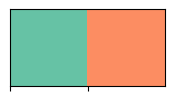

In [21]:
set2 = sns.color_palette('Set2', n_colors=2)
sns.palplot(set2)

In [28]:
    xena_metadata_df, xena_exp_df, vtx_id_to_transcripts = load_xena_tcga_gtex_target()
    transcript_to_vtx_id = {}

    for ix, row in vtx_id_to_transcripts.iterrows():
        for val in row['transcripts_exact']:
            transcript_to_vtx_id[val] = ix
    
    # xena_exp_df = xena_exp_df.T.copy()
    # xena_exp_df = xena_exp_df.loc[xena_exp_df.index.intersection(transcript_to_vtx_id.keys())]
    # xena_exp_df['vtx_id'] = xena_exp_df.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    # xena_exp_df = xena_exp_df.groupby('vtx_id').aggregate(np.sum).T

100%|██████████| 794/794 [00:00<00:00, 133051.43it/s]


In [32]:
df = pd.read_parquet('../cache/xena.parq')
df

,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study,ENST00000603548,ENST00000525546,ENST00000470968,ENST00000462950,ENST00000334919,ENST00000313695,ENST00000371069,ENST00000544211,ENST00000566797,ENST00000513453,ENST00000378858,ENST00000524131,ENST00000597725,ENST00000539417,ENST00000601249,ENST00000375682,ENST00000304800,ENST00000379561,ENST00000368751,ENST00000606895,ENST00000265195,ENST00000420316,ENST00000433197,ENST00000395118,ENST00000558492,ENST00000603524,ENST00000535174,ENST00000531972,ENST00000530617,ENST00000265560,ENST00000486975,ENST00000371344,ENST00000530781,ENST00000564907,ENST00000541395,ENST00000477442,ENST00000316292,ENST00000581080,ENST00000293880,ENST00000269187,ENST00000623306,ENST00000482378,ENST00000381395,ENST00000581851,...,ENST00000371341,ENST00000246020,ENST00000622441,ENST00000378090,ENST00000549415,ENST00000430232,ENST00000556419,ENST00000323061,ENST00000589481,ENST00000445184,ENST00000542996,ENST00000333039,ENST00000492509,ENST00000354866,ENST00000333145,ENST00000294868,ENST00000532795,ENST00000470769,ENST00000628547,ENST00000430801,ENST00000346128,ENST00000590884,ENST00000604872,ENST00000324106,ENST00000620737,ENST00000564488,ENST00000565013,ENST00000422183,ENST00000629823,ENST00000267260,ENST00000371113,ENST00000496809,ENST00000492700,ENST00000621943,ENST00000177694,ENST00000584948,ENST00000625766,ENST00000536534,ENST00000476241,ENST00000315776,ENST00000564912,ENST00000537305,ENST00000435868,ENST00000560136,ENST00000316163,ENST00000414678,ENST00000256078,ENST00000444134,ENST00000507187,ENST00000435079
GTEX-S4Q7-0003-SM-3NM8M,Cells - Ebv-Transformed Lymphocytes,Cells - Ebv-Transformed Lymphocytes,Blood,Cell Line,Male,GTEX,5.450921,0.160996,0.001000,0.001000,0.001000,1.730993,0.110998,0.001000,0.001000,0.001,0.021000,0.001000,0.001,0.841013,0.041001,1.111032,24.571261,5.040965,0.001,5.290852,1.661055,0.001000,3.801055,0.130996,0.001000,0.001000,2.150989,6.681166,14.921286,21.761408,0.041001,1.781015,1.100989,0.001000,0.001000,38.110061,8.190775,0.160996,1.551001,16.170585,0.001,1.021012,0.050999,0.001000,...,89.660460,0.001,0.950989,3.621030,0.001,0.001,0.001,1.200970,0.001000,3.091056,0.650987,0.141003,0.001000,11.830999,2.490957,0.231006,0.001000,1.030968,0.001000,0.371002,0.021000,0.421002,5.360992,3.200950,0.001000,1.281026,0.001,6.630878,0.001,0.011000,0.691020,10.070755,0.001000,0.001000,20.791184,0.001,1.191022,0.001000,9.611090,0.001000,0.001000,0.311003,0.001000,1.410982,0.081002,10.960943,0.590988,0.491002,0.531006,0.001000
TCGA-19-1787-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Male,TCGA,0.050999,0.171004,0.001000,0.001000,0.001000,8.730716,7.091054,0.001000,0.001000,0.001,0.141003,0.001000,0.001,1.071031,0.001000,0.210998,94.412109,13.370671,0.001,0.160996,1.811017,0.121002,1.811017,5.641192,0.680987,0.001000,0.330999,43.471561,6.110964,15.311036,0.090999,0.260996,0.610981,0.001000,0.001000,41.770138,2.130955,0.721014,1.091037,35.570270,0.001,15.281349,3.270928,1.330990,...,154.536091,0.001,0.600985,1.890935,0.001,0.001,0.001,18.330827,0.001000,1.471003,3.020945,14.750582,0.001000,10.221252,1.890935,0.441015,0.001000,0.340990,0.001000,0.921017,1.261028,0.050999,0.630995,0.121002,0.001000,0.621015,0.001,3.721025,0.001,0.011000,4.980878,16.630965,0.001000,6.511094,0.181005,0.001,2.141023,0.121002,0.910986,0.001000,0.001000,0.390989,0.001000,4.381121,1.461044,9.021079,0.171004,0.340990,0.160996,0.141003
TCGA-S9-A7J2-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,0.761017,0.001000,0.001000,2.860961,0.511002,15.841093,12.631027,0.001000,0.001000,0.001,0.401007,0.460988,0.001,1.230974,0.130996,0.001000,61.691508,8.051179,0.001,0.770999,1.471003,0.090999,2.371007,0.901001,0.001000,0.001000,1.471003,18.431480,5.110980,16.710697,0.231006,0.171004,0.421002,0.011000,0.001000,18.101031,1.051027,3.170917,1.820961,76.331149,0.001,14.940950,2.740996,0.021000,...,35.951997,0.001,0.271007,1.420994,0.001,

In [18]:
    xena_metadata_df, xena_exp_df, vtx_id_to_transcripts = load_xena_tcga_gtex_target()
    
    transcript_to_vtx_id = {}

    for ix, row in vtx_id_to_transcripts.iterrows():
        for val in row['transcripts_exact']:
            transcript_to_vtx_id[val] = ix
    
    xena_exp_df = xena_exp_df.T.copy()
    xena_exp_df = xena_exp_df.loc[xena_exp_df.index.intersection(transcript_to_vtx_id.keys())]
    xena_exp_df['vtx_id'] = xena_exp_df.apply(lambda x: transcript_to_vtx_id[x.name], axis=1)
    xena_exp_df = xena_exp_df.groupby('vtx_id').aggregate(np.sum).T

100%|██████████| 794/794 [00:00<00:00, 128265.19it/s]


In [19]:
xena_exp_df

vtx_id,VTX-0007082,VTX-0009335,VTX-0009670,VTX-0011570,VTX-0014206,VTX-0015094,VTX-0022943,VTX-0062325,VTX-0076639,VTX-0079935,VTX-0084101,VTX-0085275,VTX-0085575,VTX-0085734,VTX-0085991,VTX-0087707,VTX-0088126,VTX-0094405,VTX-0101354,VTX-0296454,VTX-0302164,VTX-0315807,VTX-0316937,VTX-0316938,VTX-0316976,VTX-0327813,VTX-0331005,VTX-0331059,VTX-0333182,VTX-0337413,VTX-0355814,VTX-0355819,VTX-0355824,VTX-0361728,VTX-0369900,VTX-0380537,VTX-0398369,VTX-0402680,VTX-0405049,VTX-0405050,VTX-0414654,VTX-0422271,VTX-0422275,VTX-0439900,VTX-0439932,VTX-0448853,VTX-0454924,VTX-0457097,VTX-0458254,VTX-0458347,...,VTX-0850342,VTX-0850343,VTX-0850344,VTX-0850345,VTX-0850346,VTX-0850353,VTX-0850354,VTX-0850411,VTX-0850418,VTX-0850419,VTX-0850430,VTX-0850436,VTX-0850457,VTX-0850463,VTX-0850472,VTX-0850478,VTX-0850495,VTX-0850496,VTX-0850497,VTX-0850514,VTX-0850518,VTX-0850570,VTX-0850571,VTX-0850598,VTX-0850600,VTX-0850601,VTX-0850612,VTX-0850624,VTX-0850625,VTX-0850693,VTX-0850698,VTX-0850815,VTX-0850820,VTX-0850841,VTX-0850845,VTX-0850891,VTX-0851314,VTX-0851377,VTX-0851439,VTX-0851502,VTX-0851523,VTX-0851538,VTX-0851570,VTX-0851572,VTX-0851604,VTX-0851627,VTX-0851668,VTX-0851950,VTX-0851993,VTX-0852287
GTEX-S4Q7-0003-SM-3NM8M,0.762017,0.130996,1.241997,2.781993,25.031598,17.401020,0.001000,0.001000,0.002000,2.091010,24.030587,0.042001,5.731052,0.001000,2.353041,0.340990,1.563033,0.177001,2.120934,7.601764,0.110998,0.001,0.001,6.141967,0.210998,10.858033,4.820892,0.141003,4.742028,8.450871,1.781981,0.145000,0.723013,0.001000,14.921286,0.001000,2.912991,6.861910,3.363942,1.142001,0.002000,15.916242,2.853073,1.801002,16.721942,12.346969,8.140966,0.562011,0.972994,0.330999,...,1.052027,8.192103,27.283710,8.302948,6.284010,0.061002,4.043030,0.001000,0.171004,0.001000,0.663002,0.280992,0.012,2.032965,12.091321,4.101069,0.031000,0.662002,0.001,6.301084,1.041022,0.613996,3.222949,2.820987,0.001,69.221834,11.412859,12.612244,15.431432,0.020000,2.530987,1.701020,1.091037,0.001000,38.143178,0.481997,0.001,0.001,0.630995,16.221584,0.401007,0.752008,0.002000,0.032000,22.644140,0.001,14.707991,0.001,0.021000,0.021000
TCGA-19-1787-01,3.832055,0.001000,0.002000,2.632056,0.002000,10.320922,0.001000,0.001000,0.002000,0.401007,16.721125,0.881989,3.190981,0.001000,17.712571,0.001000,3.063063,7.066974,0.970971,6.751931,0.001000,0.001,0.001,20.551803,0.240999,34.287427,3.170917,14.750582,1.282026,40.670195,0.692020,3.364929,108.082996,0.001000,6.110964,0.001000,10.672705,0.022000,0.664014,0.481997,0.022000,8.315915,4.923007,4.960894,23.222039,6.196907,0.830988,0.322003,0.433012,0.291002,...,1.201970,18.682003,28.323821,2.982963,42.383110,20.710637,4.852866,0.150998,0.001000,0.001000,0.162996,2.171061,0.002,0.762989,19.020721,0.891002,0.041001,5.732191,0.001,4.810877,2.240934,0.213994,0.123002,12.501246,0.001,64.333388,19.953194,15.212050,72.559872,9.009845,0.550991,9.370980,0.001000,0.150998,122.114133,0.002000,0.001,0.001,1.330990,35.711273,9.131172,0.002000,0.002000,0.002000,39.154243,0.001,15.067831,0.001,2.351041,0.150998
TCGA-S9-A7J2-01,94.824418,0.001000,0.372002,21.401431,0.131996,17.020482,0.001000,0.130996,0.002000,17.701504,32.769914,2.561980,1.401042,0.001000,12.682841,0.001000,13.132759,6.307031,0.231006,12.562062,0.001000,0.001,0.001,6.661914,1.710953,68.577809,1.710953,53.050704,3.632083,67.743001,0.162003,3.294996,7.253158,0.001000,5.110980,0.110998,2.173044,0.102001,18.574401,0.961994,0.002000,14.775737,19.502961,3.060994,11.401943,3.337008,3.240912,1.842013,0.922987,1.071031,...,3.502080,25.001679,52.654973,2.103024,12.463899,46.401515,7.533159,0.130996,0.001000,0.041001,1.032968,0.001000,0.002,0.473000,17.141245,3.070982,0.011000,0.902001,0.001,8.181129,7.601057,0.064002,0.073002,51.172613,0.001,66.911860,355.264163,21.952250,26.960961,68.109476,2.211001,5.071104,0.001000,0.061002,62.733722,0.002000,0.001,0.001,1.751025,76.382147,12.110613,0.172004,0.881991,0.002000,38.243635,0.001,29.288431,0.001,6.730903,0.071002
GTEX-QV31-1626-SM-2S1QC,0.

In [6]:
def load_xena_tcga_gtex_target():
    xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)
    xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
    xena_expression.index = xena_expression.pop('index')
    xena_metadata = xena_metadata.loc[xena_expression.index]
    vtx_id_to_transcripts = json.load(open('./data/vtx_to_ensembl_ids.json', 'r'))
    return xena_metadata, xena_expression, vtx_id_to_transcripts
xena_metadata, xena_expression, vtx_id_to_transcripts = load_xena_tcga_gtex_target()

In [104]:
def load_tcga_tumor_vs_nat(xena_metadata, xena_expression):
    cancers = pd.read_csv('./data/cancer_types.txt', header=None, names = ['Disease', 'Code'])
    cancers.index = [i.lower() for i in cancers['Disease']]
    tcga_paired_normal = {}
    tcga_paired_normal_index = []
    pairs = pd.read_excel('./data/tissue_pairs.xlsx')
    for ix, row in pairs.iterrows():
        if isinstance(row['NAT (Solid Tissue Normal)'], str):
            tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
            for cancer in tcga_groups['primary disease or tissue'].unique():
                primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Primary Tumor')].index
                normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
                if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                    tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                    tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
        else:
            continue
    tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
    tcga_nat_table.insert(0, 'Cancer', '')
    tcga_nat_table.insert(1, 'Condition', '')
    for c, s in tcga_paired_normal.items():
        tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
        tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
        tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
        tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
    ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
    ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()
    stats_per_tumor = {}
    for c, s in tcga_paired_normal.items():
        tumor = tcga_nat_table.loc[s['Tumor'], tcga_nat_table.columns[2:]]
        normal = tcga_nat_table.loc[s['NAT'], tcga_nat_table.columns[2:]]
        logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
        test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')

        stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
                 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
        stats_per_tumor[c] = stats.copy()
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    return ave_per_transcript_per_cancer, logfcs, stats_per_tumor
ave_per_transcript_per_cancer, logfcs, stats_per_tumor = load_tcga_tumor_vs_nat(xena_metadata, xena_expression)

In [111]:
transcript_ids = tids

In [114]:
logfcs

-2.8838033326607477

In [118]:
logfcs

-2.8838033326607477

In [119]:
test_statistic

-3.024028244192858

In [ ]:
tumor

In [139]:
normal = tcga_nat_table[tcga_nat_table.Condition=='Normal Adjacent']8
tumor = tcga_nat_table[tcga_nat_table.Condition=='Cancer'].groupby('Cancer')[overlap].mean().sum(axis=1)
logfcs = tumor - normal
test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
p_value

0.2086852353761599

In [132]:
    overlap = list(set(transcript_ids).intersection(set(tcga_nat_table.columns[2:])))
    tumor = tcga_nat_table.loc[s['Tumor'], overlap].sum(axis=1)
    normal = tcga_nat_table.loc[s['NAT'], overlap].sum(axis=1)
    logfcs = tumor - normal
    test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
    
    # stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
             # 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)

In [ ]:
def estimate_ranksums_per_sorf(tcga_nat_table, transcript_ids):
    overlap = set(transcript_ids).intersection(set(tcga_nat_table.columns[2:]))
    tumor = tcga_nat_table.loc[s['Tumor'], overlap].sum(axis=1)
    normal = tcga_nat_table.loc[s['NAT'], overlap].sum(axis=1)
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')
    stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
             'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
    

In [109]:
for vtx_id, tids in vtx_id_to_transcripts.items():
    
    break
tids

['ENST00000263741',
 'ENST00000360001',
 'ENST00000459994',
 'ENST00000465727',
 'ENST00000660930']

In [15]:
import jsonlines
def load_esmfold():
    esmfold = {}
    with jsonlines.open('./data/phase1to6_secreted_esmfold.json') as fopen:
        for l in fopen.iter():
            esmfold[l['sequence']] = l
    return esmfold
e = load_esmfold()
# e = {v['id']: v['mean_plddt'] for k, v in e.items()}


784

In [73]:
#@title Display 3D structure {run: "auto"}
import py3Dmol
import glob
import matplotlib.pyplot as plt
rank_num = 1 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
color = "lDDT" #@param ["chain", "lDDT", "rainbow"]
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}

def plot_plddt_legend(dpi=100):
  thresh = ['plDDT:','Very low (<50)','Low (60)','OK (70)','Confident (80)','Very high (>90)']
  plt.figure(figsize=(1,0.1),dpi=dpi)
  ########################################
  for c in ["#FFFFFF","#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF"]:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False,
             loc='center', ncol=6,
             handletextpad=1,
             columnspacing=1,
             markerscale=0.5,)
  plt.axis(False)
  return plt


def show_pdb(pdb, rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
  model_name = f"rank_{rank_num}"
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(pdb ,'pdb')

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(queries[0][1]) + 1 if is_complex else 1
    for n,chain,color in zip(range(chains),list("ABCDEFGH"),
                     ["lime","cyan","magenta","yellow","salmon","white","blue","orange"]):
      view.setStyle({'chain':chain},{'cartoon': {'color':color}})
  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})  
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view

In [ ]:
py3Dmol.view(

In [30]:
import pandas as pd
from st_aggrid import AgGrid
import json
import numpy as np

df = pd.read_excel('./data/interim_phase1to6_secreted_hits_20230330.xlsx')

In [71]:
import plotly.express as px
px.plotly

In [69]:
import jsonlines
esmfold = {}
with jsonlines.open('./data/phase1to6_secreted_esmfold.json') as fopen:
    for l in fopen.iter():
        esmfold[l['sequence']] = l


In [36]:
np.percentile(e['IAFTVFFRLLRTWHLQMAPVHVLCCVSVLLATFYLTPTESAGSLVSYTPNSCCYGFQQHPPPVQILKEWYPTSPACPKPGVILLTKRGRQICADPSKNWVRQLMQRLPAIA']['plddt'], 90)

83.3119888305664

In [18]:
    xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)
    xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
    xena_expression.index = xena_expression.pop('index')
    xena_metadata = xena_metadata.loc[xena_expression.index]
    vtx_id_to_transcripts = json.load(open('./data/vtx_to_ensembl_ids.json', 'r'))

In [31]:
xena_metadata.columns

Index(['detailed_category', 'primary disease or tissue', '_primary_site',
       '_sample_type', '_gender', '_study'],
      dtype='object')

In [22]:
sorf_excel_table = pd.read_excel('./data/interim_phase1to6_secreted_hits_20230330.xlsx')

In [20]:
st.session_state['id_type_selected'] = 'primary_id'

2023-04-07 19:33:13.526 Session state does not function when running a script without `streamlit run`


In [ ]:
sorf_excel_table[st.session_state['id_type_selected']]

In [24]:
sorf_excel_table.head(3)

,vtx_id,primary_id,genscript_id,phase,orf_xref,protein_xrefs,gene_xref,transcript_xref,source,sec_trans_ratio,...,chromosome,strand,start,end,chrom_starts,block_sizes,phases,nucl,aa,isoform_of
0,VTX-0850284,smORF32119,U8990HF130-8,Phase 1,smORF32119;U8990HF130-8,smORF32119;6xhis-HSA-HRV3C-smORF32119_02;VTXRP011,ENSG00000078808.20;HGNC:24188;SDF4;24188;51150...,CHS.68.20;CHS.68.7;CHS.68.8;ENST00000360001.12...,velia_phase1_secreted_smORFs,1.459455,...,chr1,-,1228464,1228739,1228464,275,0,GCTCCGTGCTGCCTCTGGCTCCTGGGGGCAGTCCTTCTGATGGACG...,APCCLWLLGAVLLMDASARPANHSSTRERVANREENEILPPDHLNG...,"['ENSP00000435962.1', 'ENSP00000263741.8', 'EN..."
1,VTX-0850613,smORF85917,U6813HF130-147,Phase 1,smORF85917;U6813HF130-147,smORF85917,220323;28752;ENSG00000184232.9;gene-OAF;HGNC:2...,CHS.10211.2;ENST00000328965.9;NM_178507.4;OTTH...,velia_phase1_secreted_smORFs,1.682371,...,chr11,+,120211301,120211552,120211301,251,0,CTGGCGCGCCCTGCGCTGCTGCTGCTGCTGCCGCTGCTCGCGCCGC...,LARPALLLLLPLLAPLLGTGAPAELRVRVRLPDGQVTEESLQADSD...,NaN
2,VTX-0850424,smORF419458,U8990HF130-150,Phase 1,smORF419458;U8990HF130-150,smORF419458;6xhis-HSA-HRV3C-smORF419458_02;VTX...,ENSG00000164106.8;HGNC:17036;SCRG1;11341;17036...,CHS.41825.2;ENST00000296506.8;NM_007281.4;OTTH...,velia_phase1_secreted_smORFs,1.265618,...,chr4,-,173391169,173391408,173391169,239,0,CTGATGGTACTTGTTTTCACCATTGGGCTAACTTTGCTGCTAGGAG...,LMVLVFTIGLTLLLGVQAMPANRLSCYRKILKDHNCHNLPEGVADL...,"['ENSP00000425404.1', 'ENSP00000296506.2']"


In [5]:
vtx_id = 'VTX-0850284'

In [6]:
selected_transcripts = vtx_id_to_transcripts[vtx_id]

KeyError: 'VTX-0850284'

In [ ]:
selected_expression = xena_expression[xena_expression.columns.intersection(selected_transcripts)]

In [ ]:
groups = list(map(lambda x: '-'.join(map(str, x)), xena_metadata[['_primary_site', '_study']].values))
selected_expression.groupby(groups).mean()

In [29]:
vtx_id = sorf_excel_table[sorf_excel_table['primary_id'] == 'smORF32119']
vtx_id.iloc[0]['vtx_id']

'VTX-0850284'

In [37]:
ag_df.columns

NameError: name 'ag_df' is not defined

In [42]:

xena_metadata = pd.read_table('./data/TcgaTargetGTEX_phenotype.txt', encoding='latin-1', index_col=0)

In [45]:
xena_expression = pd.read_feather('./data/xena_ucsc_phase1to6.feather')
xena_expression.index = xena_expression.pop('index')

In [ ]:
def load_tcga_tumor_vs_nat(xena_metadata, xena_expression):
    cancers = pd.read_csv('./data/cancer_types.txt', header=None, names = ['Disease', 'Code'])
    cancers.index = [i.lower() for i in cancers['Disease']]
    tcga_paired_normal = {}
    tcga_paired_normal_index = []
    pairs = pd.read_excel('./data/tissue_pairs.xlsx')
    for ix, row in pairs.iterrows():
        if isinstance(row['NAT (Solid Tissue Normal)'], str):
            tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
            for cancer in tcga_groups['primary disease or tissue'].unique():
                primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Primary Tumor')].index
                normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                                   (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
                if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                    tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                    tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
        else:
            continue
    tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
    tcga_nat_table.insert(0, 'Cancer', '')
    tcga_nat_table.insert(1, 'Condition', '')
    for c, s in tcga_paired_normal.items():
        tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
        tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
        tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
        tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
    ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
    ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()
    stats_per_tumor = {}
    for c, s in tqdm(tcga_paired_normal.items()):
        tumor = tcga_nat_table.loc[s['Tumor'], tcga_nat_table.columns[2:]]
        normal = tcga_nat_table.loc[s['NAT'], tcga_nat_table.columns[2:]]
        logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
        test_statistic, p_value = ranksums(tumor, normal, alternative='two-sided')

        stats = pd.DataFrame({'ranksum': test_statistic, 'p_value': p_value, 'logFC': logfcs.values, 
                 'FDR': multipletests(p_value, method='fdr_bh')[1]}, index=tumor.columns)
        stats_per_tumor[c] = stats.copy()
    logfcs = tumor.mean(axis=0) - normal.mean(axis=0)
    return ave_per_transcript_per_cancer

In [48]:
tcga_paired_normal = {}
tcga_paired_normal_index = []
pairs = pd.read_excel('./data/tissue_pairs.xlsx')
for ix, row in pairs.iterrows():
    if isinstance(row['NAT (Solid Tissue Normal)'], str):
        tcga_groups = xena_metadata[(xena_metadata['_primary_site'] == row['Tissue (Disease)']) & (xena_metadata['_study'] == 'TCGA')].copy()
        for cancer in tcga_groups['primary disease or tissue'].unique():
            primary_tumor_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                               (tcga_groups['_sample_type']=='Primary Tumor')].index
            normal_adjacent_samples = tcga_groups[(tcga_groups['primary disease or tissue']==cancer) & 
                                               (tcga_groups['_sample_type']=='Solid Tissue Normal')].index
            if len(primary_tumor_samples)>=8 and (len(normal_adjacent_samples)>=8):
                tcga_paired_normal[cancer] = {'Tumor': primary_tumor_samples, 'NAT': normal_adjacent_samples}
                tcga_paired_normal_index += list(primary_tumor_samples)+list(normal_adjacent_samples)
    else:
        continue
tcga_nat_table = xena_expression.loc[tcga_paired_normal_index].copy()
tcga_nat_table.insert(0, 'Cancer', '')
tcga_nat_table.insert(1, 'Condition', '')
for c, s in tcga_paired_normal.items():
    tcga_nat_table.loc[s['Tumor'], 'Cancer'] = c
    tcga_nat_table.loc[s['NAT'], 'Cancer'] = c
    tcga_nat_table.loc[s['Tumor'], 'Condition'] = 'Cancer'
    tcga_nat_table.loc[s['NAT'], 'Condition'] = 'Normal Adjacent'
ave_per_transcript_per_cancer = tcga_nat_table.groupby(['Cancer', 'Condition']).mean()
ave_per_transcript_per_cancer = ave_per_transcript_per_cancer.reset_index()

In [55]:
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests

100%|██████████| 17/17 [00:13<00:00,  1.26it/s]


In [102]:
base_link = "http://genome.ucsc.edu/cgi-bin/hgTracks?"
genome = "db=hg38"
chrom = 'chr15'
start = 64162657
end = 64162944
position = f"{chrom}:{start}-{end}"
ucsc_link = f"{base_link}{genome}&position={position}"
ucsc_link

'http://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&position=chr15:64162657-64162944'

In [60]:
ave_per_transcript_per_cancer.head(2)

,Cancer,Condition,ENST00000046640,ENST00000064724,ENST00000075322,ENST00000084795,ENST00000175756,ENST00000181796,ENST00000217121,ENST00000217428,...,ENST00000630242,ENST00000630243,ENST00000630417,ENST00000630482,ENST00000630717,ENST00000630863,ENST00000630874,ENST00000631105,ENST00000631189,ENST00000631366
0,Bladder Urothelial Carcinoma,Cancer,2.292933,-0.673245,-6.154497,10.058762,3.934293,-9.747943,-7.480388,-8.799299,...,-5.787936,-7.865831,-6.052789,-9.111968,-9.69137,-9.588936,-8.823113,-9.623387,-9.411501,-7.611047
1,Bladder Urothelial Carcinoma,Normal Adjacent,1.988821,2.076905,-2.803753,9.745568,3.644284,-9.965800,-9.253105,-7.373000,...,-4.918753,-6.807900,-7.600558,-9.965800,-9.96580,-8.616100,-8.508921,-8.703642,-9.579963,-8.699458


In [64]:
import altair as alt

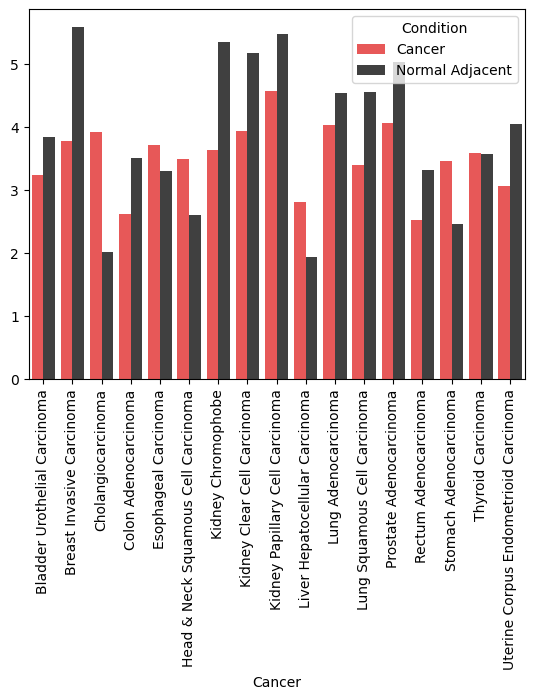

In [98]:
selected_transcripts = ['ENST00000046640', 'ENST00000064724']
exp_bplot = sns.barplot(data = ave_per_transcript_per_cancer, x='Cancer',
            y=ave_per_transcript_per_cancer[selected_transcripts].apply(lambda x: np.log2(np.sum(np.exp(x)-1)+1), axis=1),
            hue='Condition', alpha=0.75, palette=["r", "k"])
exp_bplot.set_xticks(exp_bplot.get_xticks(), exp_bplot.get_xticklabels(), rotation=90)

In [162]:
selected_expression

,ENST00000263741,ENST00000360001,ENST00000459994,ENST00000465727
index,,,,
GTEX-S4Q7-0003-SM-3NM8M,0.7146,5.3924,0.1903,-1.2142
TCGA-19-1787-01,2.3620,6.9667,-1.1172,-0.4921
TCGA-S9-A7J2-01,0.0990,5.3948,1.7489,-9.9658
GTEX-QV31-1626-SM-2S1QC,1.7446,6.4748,2.6278,-0.9971
TCGA-G3-A3CH-11,0.8726,5.8836,-1.8836,-9.9658
...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,2.6019,6.2493,-9.9658,-0.6643
TCGA-DD-A115-01,1.9527,7.0944,2.8280,-9.9658
GTEX-ZA64-2126-SM-5Q5A8,2.5756,6.3036,-0.0725,-9.9658


In [173]:
selected_expression.min()

ENST00000263741   -9.9658
ENST00000360001   -9.9658
ENST00000459994   -9.9658
ENST00000465727   -9.9658
dtype: float64

In [183]:
        xena_expression.apply(lambda x: np.exp2(x).round(3)-0.001).min()

ENST00000046640    0.0
ENST00000064724    0.0
ENST00000075322    0.0
ENST00000084795    0.0
ENST00000175756    0.0
                  ... 
ENST00000630863    0.0
ENST00000630874    0.0
ENST00000631105    0.0
ENST00000631189    0.0
ENST00000631366    0.0
Length: 2020, dtype: float64

In [198]:
expression_table = {}
xena_metadata = xena_metadata.loc[xena_metadata._primary_site.dropna().index].copy()
for vtx_id in tqdm(df['vtx_id']):
    # Plot transcript expression levels
    selected_transcripts = vtx_id_to_transcripts[vtx_id]
    xena_overlap = xena_expression.columns.intersection(selected_transcripts)
    if len(xena_overlap)>=1:
        selected_expression = xena_expression[xena_overlap].copy()
        selected_expression = selected_expression.apply(lambda x: np.exp2(x).round(3)-0.001)
        groups = list(map(lambda x: '-'.join(map(str, x)), xena_metadata[['_study', '_primary_site', '_sample_type']].values))
        e = selected_expression.loc[xena_metadata.index].groupby(groups).mean().sum(axis=1)
        expression_table[vtx_id] = e
    else:
        expression_table[vtx_id] = [np.nan]*len(set(groups))
        # break

100%|██████████| 805/805 [00:43<00:00, 18.69it/s]


In [203]:
pd.DataFrame(expression_table).T.to_excel('sorf_expression_tcga_gtex_target.xlsx')

In [156]:
xena_metadata.loc[~(xena_metadata[['_study', '_primary_site', '_sample_type']].isna())]

ValueError: Cannot index with multidimensional key

In [143]:
groups

['Blood-GTEX',
 'Brain-TCGA',
 'Brain-TCGA',
 'Blood Vessel-GTEX',
 'Liver-TCGA',
 'Uterus-GTEX',
 'Thyroid-GTEX',
 'Blood Vessel-GTEX',
 'Cervix-TCGA',
 'Colon-TCGA',
 'Brain-TCGA',
 'Blood Vessel-GTEX',
 'Lining of body cavities-TCGA',
 'Skin-TCGA',
 'Muscle-GTEX',
 'Lung-GTEX',
 'Skin-GTEX',
 'Lung-TCGA',
 'Muscle-GTEX',
 'Colon-GTEX',
 'Testis-TCGA',
 'Nerve-GTEX',
 'Soft tissue,Bone-TCGA',
 'Kidney-TCGA',
 'Breast-TCGA',
 'Skin-GTEX',
 'Nerve-GTEX',
 'Prostate-TCGA',
 'Stomach-TCGA',
 'Esophagus-TCGA',
 'Skin-TCGA',
 'Kidney-TCGA',
 'White blood cell-TARGET',
 'Brain-GTEX',
 'Blood-GTEX',
 'Kidney-TCGA',
 'Thyroid-GTEX',
 'Brain-TCGA',
 'Soft tissue,Bone-TCGA',
 'Stomach-TCGA',
 'Prostate-TCGA',
 'Breast-TCGA',
 'Lung-GTEX',
 'Head and Neck region-TCGA',
 'Prostate-TCGA',
 'Muscle-GTEX',
 'Cervix-TCGA',
 'Brain-TCGA',
 'Thyroid-GTEX',
 'Kidney-TCGA',
 'Ovary-TCGA',
 'Kidney-TCGA',
 'Prostate-TCGA',
 'Skin-TCGA',
 'Blood Vessel-GTEX',
 'Lung-GTEX',
 'Colon-TCGA',
 'Breast-TCGA',
 '